## Create visualizations for high wage jobs in California

Need to begin by specifying the desired year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
import seaborn as sns
import string
import warnings
import os
import re
from datetime import datetime
from jqi_functions import *
import plotly.express as px
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Begin by specifying the year of outputs, respective cost of living year, and desired year of IPUMS data for the wage histograms.

In [2]:
outputs_year = '2020'
col_year = '2019'
ipums_year = '2019'

#### Load Data

In [3]:
data = pd.read_csv(f'data/outputs/hw_outputs_{outputs_year}.csv')

In [4]:
county_info = pd.read_csv('data/county_to_regions_key.csv')

In [5]:
cost_of_living = pd.read_csv(f'data/cost_of_living/united-way-col-1A1PS1C{col_year}.csv') # 1 adult, 1 preschooler, 1 child

In [6]:
data.head()

Industry        Date         Region  \
0  accommodation and food services  2020-01-01  Inland Empire   
1  accommodation and food services  2020-02-01  Inland Empire   
2  accommodation and food services  2020-03-01  Inland Empire   
3  accommodation and food services  2020-04-01  Inland Empire   
4  accommodation and food services  2020-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living  Region Population  
0            14133          154200.0           63149            4560470  
1            14371          156800.0           63149            4560470  
2            14105          153900.0           63149            4560470  
3             8762           95600.0           63149            4560470  
4             9394          102500.0           63149            4560470

### Histogram of wages by industry

In [7]:
ca_ipums = cleaned_ipums(ipums_year)

In [8]:
ca_ipums.head()

YEAR  COUNTYFIP INDNAICS  PERWT  INCWAGE NAICS Code  \
0  2019         37     4853   21.0    23100       4853   
1  2019         37     4853   21.0    23100       4853   
2  2019         37     4853   11.0    28000       4853   
3  2019         37     4853   11.0    28000       4853   
4  2019         37     4853   35.0    28000       4853   

               Industry Title                    Industry  Crosswalk Value  
0  taxi and limousine service  taxi and limousine service               11  
1  taxi and limousine service  taxi and limousine service               14  
2  taxi and limousine service  taxi and limousine service               11  
3  taxi and limousine service  taxi and limousine service               14  
4  taxi and limousine service  taxi and limousine service               11

In [9]:
ca_ipums = ca_ipums.loc[ca_ipums.index.repeat(ca_ipums.PERWT)].reset_index(drop=True)

In [10]:
ca_ipums_wages = ca_ipums.groupby(by=['Crosswalk Value']).mean()

In [11]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['CERF Regions']).mean()

In [12]:
ca_ipums_minelog = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 1) |
                               (ca_ipums['Crosswalk Value'] == 3)]

ca_ipums_farm = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 2)]

ca_ipums_const = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 3) |
                             (ca_ipums['Crosswalk Value'] == 4) |
                             (ca_ipums['Crosswalk Value'] == 5) |
                             (ca_ipums['Crosswalk Value'] == 6) |
                             (ca_ipums['Crosswalk Value'] == 7)]

ca_ipums_manu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 8) |
                            (ca_ipums['Crosswalk Value'] == 9) |
                            (ca_ipums['Crosswalk Value'] == 10)]

ca_ipums_ttu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 11) |
                           (ca_ipums['Crosswalk Value'] == 12) |
                           (ca_ipums['Crosswalk Value'] == 13) |
                           (ca_ipums['Crosswalk Value'] == 14) |
                           (ca_ipums['Crosswalk Value'] == 15) |
                           (ca_ipums['Crosswalk Value'] == 16) |
                           (ca_ipums['Crosswalk Value'] == 17)]

ca_ipums_info = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 18)]

ca_ipums_fin = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 19) |
                           (ca_ipums['Crosswalk Value'] == 20) |
                           (ca_ipums['Crosswalk Value'] == 21)]

ca_ipums_prof = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 22) |
                            (ca_ipums['Crosswalk Value'] == 23) |
                            (ca_ipums['Crosswalk Value'] == 24) |
                            (ca_ipums['Crosswalk Value'] == 25)]

ca_ipums_eduhealth = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 26) |
                                 (ca_ipums['Crosswalk Value'] == 27) |
                                 (ca_ipums['Crosswalk Value'] == 28)]

ca_ipums_leisure = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 29) |
                               (ca_ipums['Crosswalk Value'] == 30) |
                               (ca_ipums['Crosswalk Value'] == 31)]

ca_ipums_other = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 32) |
                             (ca_ipums['Crosswalk Value'] == 33) |
                             (ca_ipums['Crosswalk Value'] == 34) |
                             (ca_ipums['Crosswalk Value'] == 35) |
                             (ca_ipums['Crosswalk Value'] == 0)]

ca_ipums_gov = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 36) |
                           (ca_ipums['Crosswalk Value'] == 37) |
                           (ca_ipums['Crosswalk Value'] == 38)]

In [13]:
main_ind_dfs = [ca_ipums_minelog, ca_ipums_farm, ca_ipums_const, ca_ipums_manu, ca_ipums_ttu, ca_ipums_info, ca_ipums_fin, ca_ipums_prof, ca_ipums_eduhealth, ca_ipums_leisure, ca_ipums_other, ca_ipums_gov]

In [14]:
main_ind_titles = ['Mining & Logging', 'Total Farm', 'Construction', 'Manufacturing', 'Trade, Transportation, & Utilities', 'Information', 'Financial Activities', 'Professional & Business Services', 'Educational & Health Services', 'Leisure & Hospitality', 'Other Services', 'Government']

In [15]:
ca_col = cost_of_living['Cost of Living'][13]

In [16]:
def plot_hist(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        avg_ind_wage = np.mean(df_lists[i]['INCWAGE'])
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Distribution of Wages', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        
        y, x_, _ = ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        
        ax[n_row, n_col].vlines(x=ca_col, ymin=0, ymax=y.max(),
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
        ax[n_row, n_col].vlines(x=avg_ind_wage, ymin=0, ymax=y.max(), 
          color='#b50000', lw=2, ls='dashed', label=f'Average Wage of {titles[i]}: $ {round(avg_ind_wage)}')
        
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        
        handles, labels = ax[n_row, n_col].get_legend_handles_labels()
        ax[n_row, n_col].legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.4, 0.75), loc='upper left', fontsize=12)
        
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

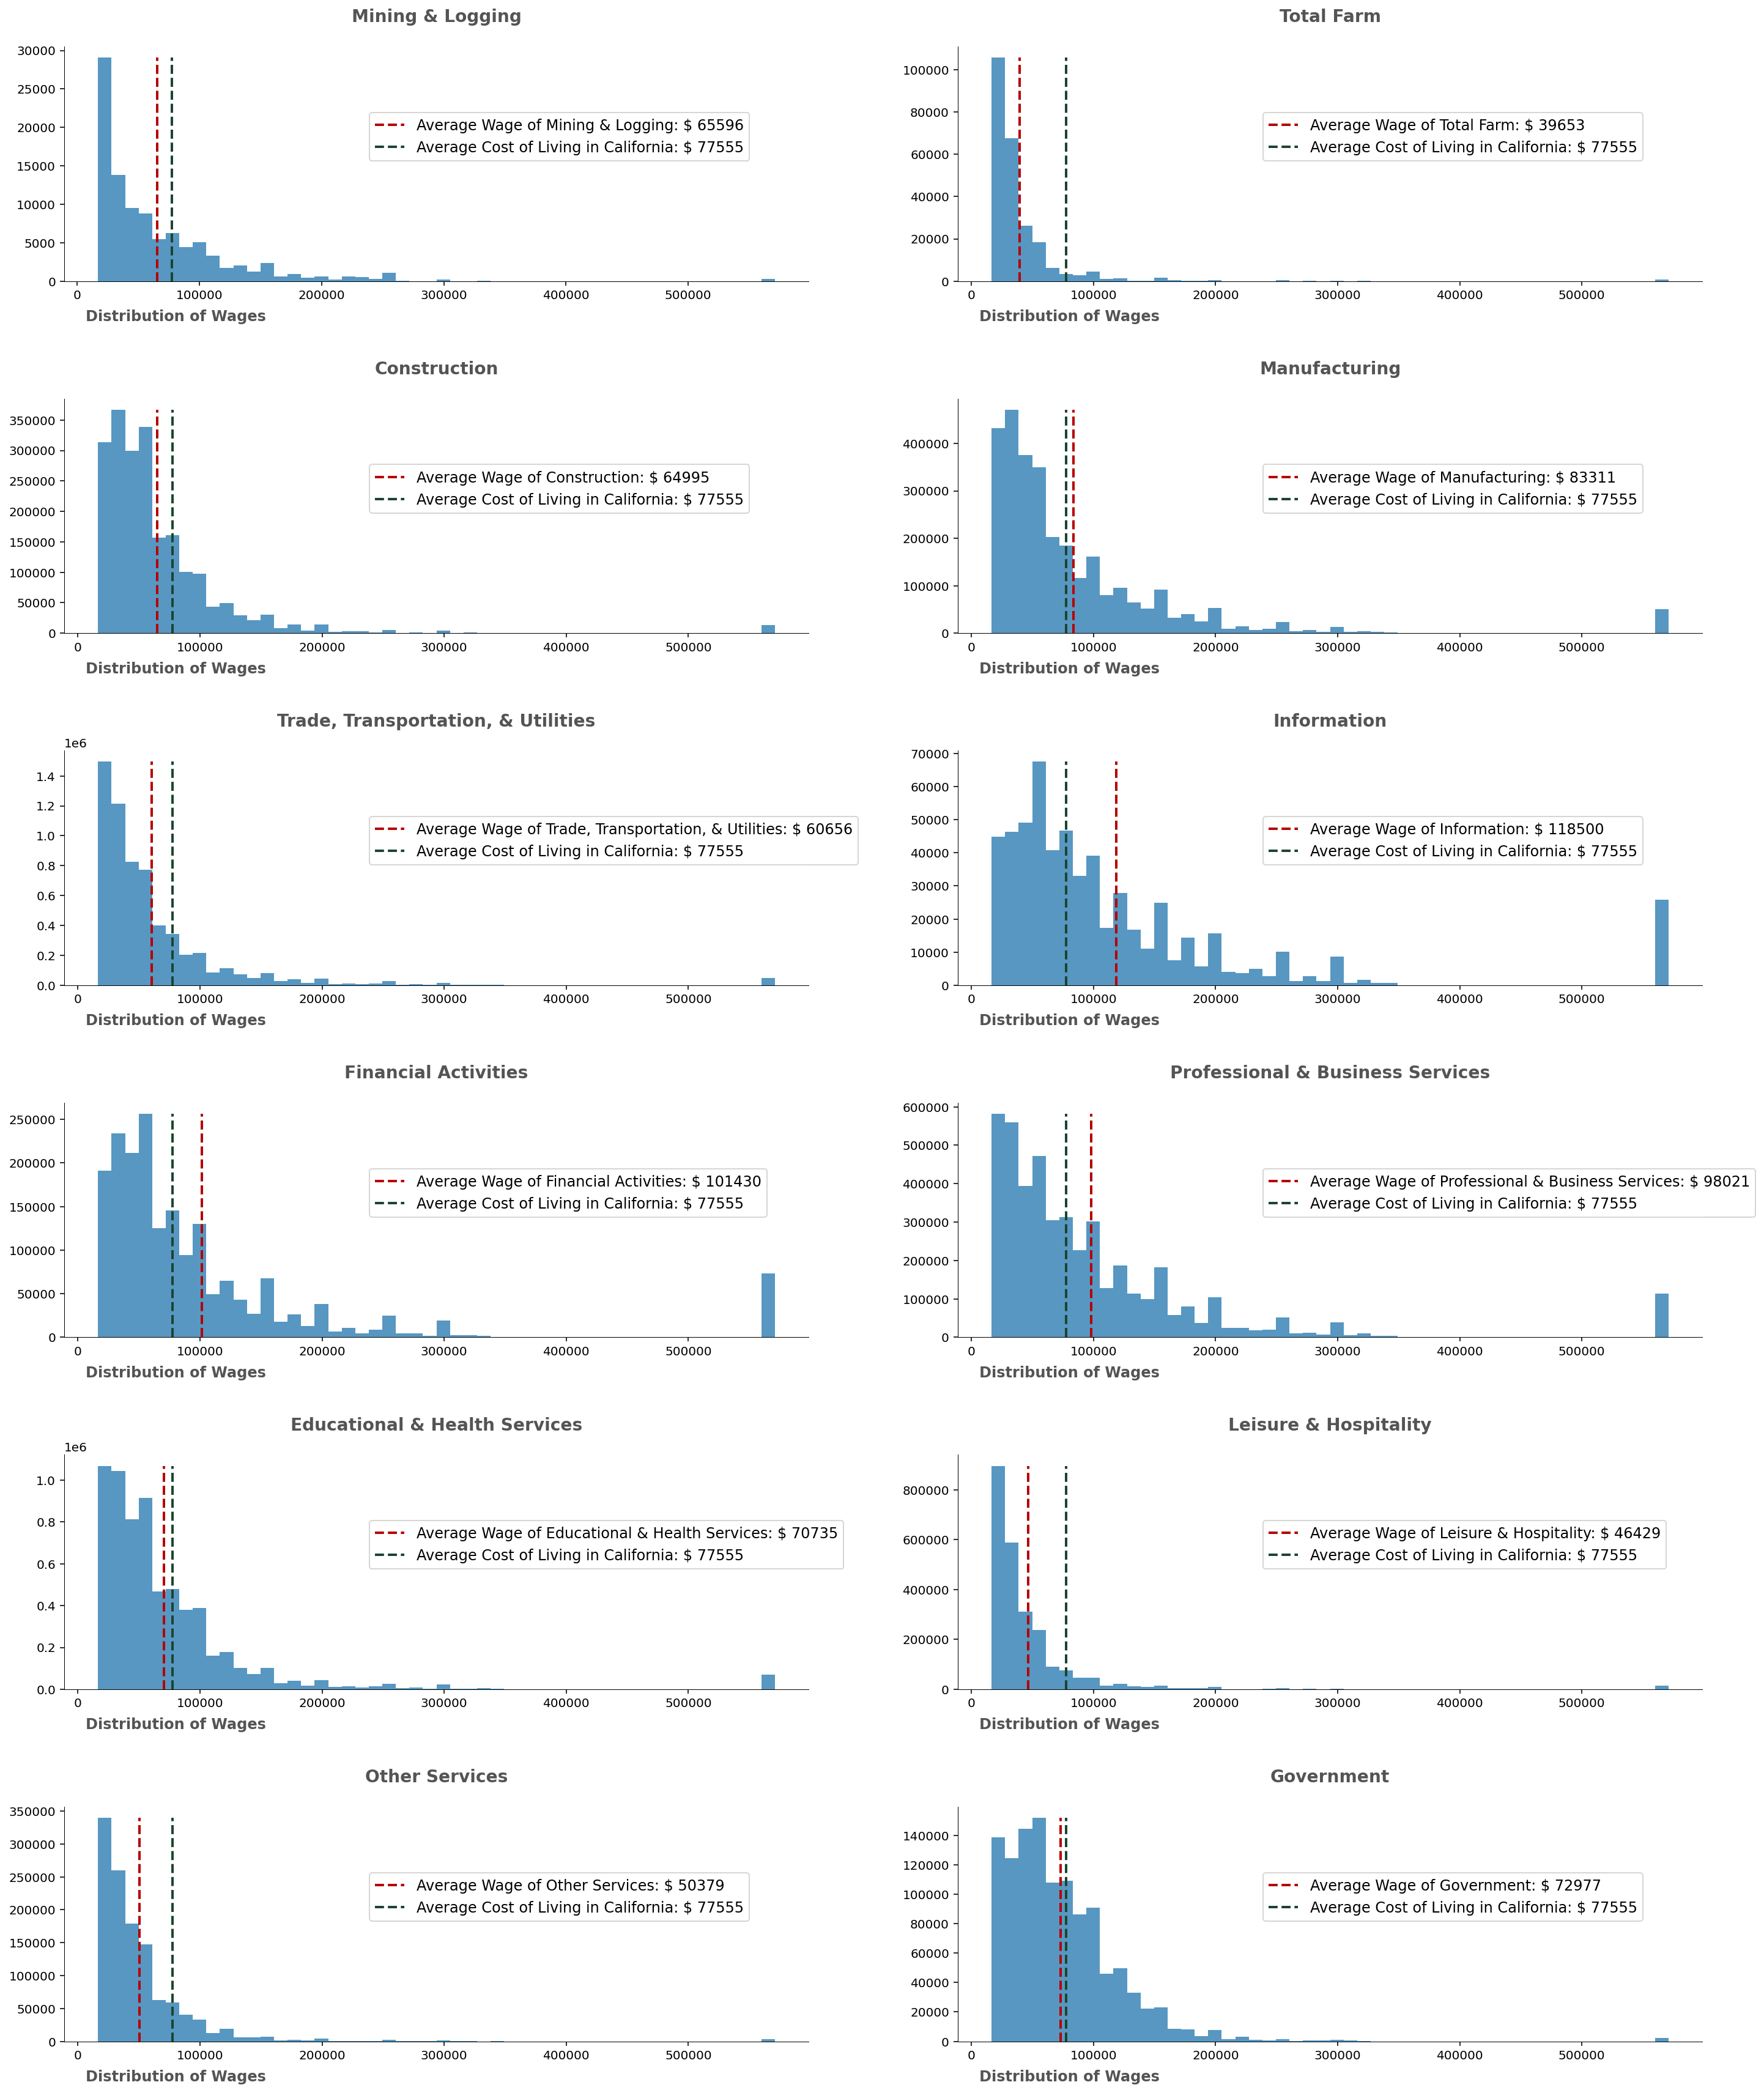

In [17]:
plot_hist(main_ind_dfs, main_ind_titles)

In [18]:
ca_ipums_wages_regions = ca_ipums_wages_regions.sort_values('INCWAGE')
ca_ipums_wages_regions

YEAR  COUNTYFIP       PERWT       INCWAGE  \
CERF Regions                                                        
Redwood Coast         2019.0  23.000000  191.464439  53760.774921   
Central San Joaquin   2019.0  44.331232  202.253046  55613.913162   
Kern                  2019.0  29.000000  227.949695  55873.711395   
Northern San Joaquin  2019.0  79.978446  189.814026  57049.075765   
Inland Empire         2019.0  67.858489  191.987525  57692.953395   
North State           2019.0  44.169146  169.159953  63688.023715   
Los Angeles           2019.0  37.000000  147.994623  66152.392842   
Sacramento            2019.0  65.915549  160.129162  70372.072976   
Central Coast         2019.0  96.327999  170.623469  71400.707110   
San Diego-Imperial    2019.0  71.623348  184.202568  71763.330698   
Orange                2019.0  59.000000  161.462115  78709.040002   
Bay Area              2019.0  54.678246  159.468942  98611.627773   

                      Crosswalk Value    Population  
CERF Regions                                         
Redwood Coast               20.812049  1.359400e+05  
Central San Joaquin         19.455217  7.164323e+05  
Kern                        17.883151  8.876410e+05  
Northern San Joaquin        17.828931  6.009149e+05  
Inland Empire               19.115122  2.286424e+06  
North State                 20.272760  2.046918e+05  
Los Angeles                 19.948660  1.008157e+07  
Sacramento                  20.813233  1.108383e+06  
Central Coast               19.718376  5.874596e+05  
San Diego-Imperial          20.606638  3.226150e+06  
Orange                      19.372887  3.168044e+06  
Bay Area                    19.885909  1.261716e+06

In [19]:
avg_wage = ca_ipums['INCWAGE'].mean()
avg_wage

73508.79510779136

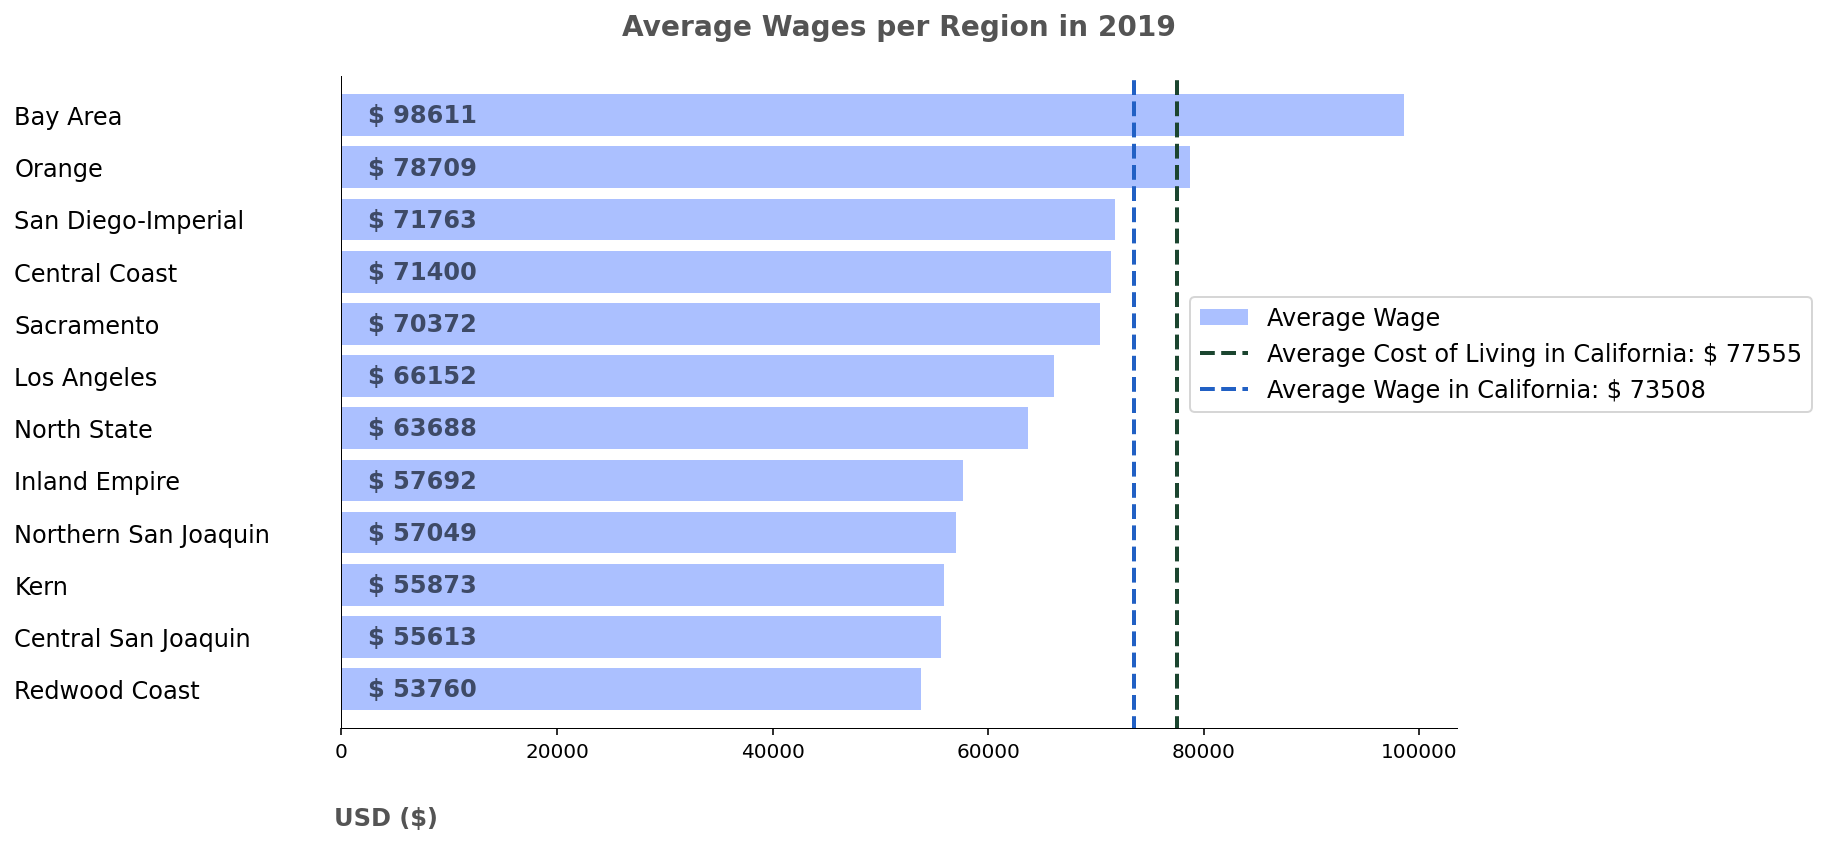

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), ca_ipums_wages_regions['INCWAGE'].values, color='#abc0ff', label="Average Wage")

ax.set_yticks(np.arange(12))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][13]

ax.vlines(x=avg_wage, ymin=-0.8, ymax=12, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $ {int(avg_wage)}')
ax.vlines(x=ca_col, ymin=-0.8, ymax=12, 
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
ax.set_ylim(-0.75, 11.75)

ax.set_title(f'Average Wages per Region in {ipums_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(ca_ipums_wages_regions)):
    ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[i])}", (2500, -0.15+i), size=12, weight='bold', color='#3e4a66', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.75, 0.68), loc='upper left', fontsize=12)
plt.show()

In [21]:
col_regions = cost_of_living[0:13].groupby('Regions').mean().sort_values('Cost of Living')
col_regions

Cost of Living
Regions                             
Kern                           54862
Central San Joaquin            56000
Northern San Joaquin           57805
North State                    58128
Redwood Coast                  58613
Eastern Sierra                 61261
Sacramento                     63097
Inland Empire                  63149
San Diego-Imperial             77956
Central Coast                  78200
Los Angeles                    80216
Orange                         87648
Bay Area                       97249

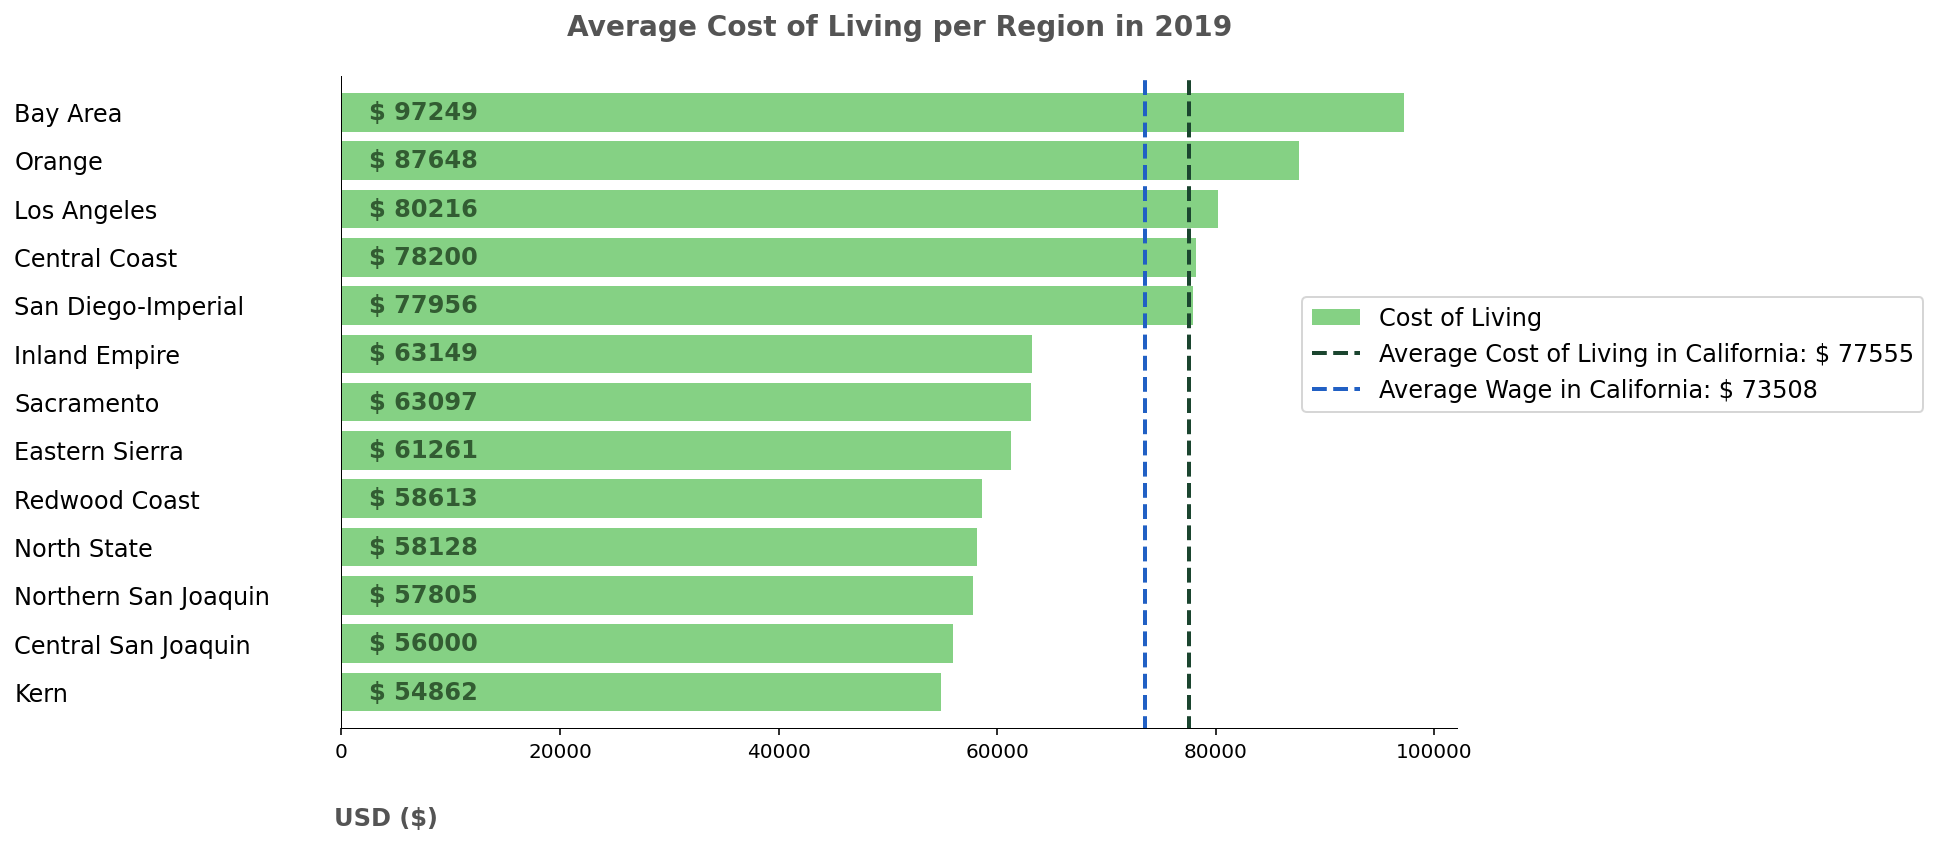

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(13), col_regions['Cost of Living'].values, color='#85d184', label="Cost of Living")

ax.set_yticks(np.arange(13))
ax.set_yticklabels(col_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][13]

ax.vlines(x=avg_wage, ymin=-0.8, ymax=13, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $ {int(avg_wage)}')
ax.vlines(x=ca_col, ymin=-0.8, ymax=13, 
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
ax.set_ylim(-0.75, 12.75)

ax.set_title(f'Average Cost of Living per Region in {col_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(col_regions)):
    ax.annotate(f"$ {int(col_regions['Cost of Living'].values[i])}", (2500, -0.15+i), size=12, weight='bold', color='#325c32', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.68), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over specified year

In [23]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100
hw_state

High Wage Count  Employment Count  Cost of Living  \
Date                                                            
2020-01-01          4712169        16876700.0        15808010   
2020-02-01          4749545        16992700.0        15808010   
2020-03-01          4716804        16819500.0        15808010   
2020-04-01          4226683        14428900.0        15808010   
2020-05-01          4282213        14716400.0        15808010   
2020-06-01          4364580        15180400.0        15808010   
2020-07-01          4339416        15074600.0        15808010   
2020-08-01          4383859        15200600.0        15808010   
2020-09-01          4403975        15330000.0        15808010   
2020-10-01          4458219        15548900.0        15808010   
2020-11-01          4473097        15627800.0        15808010   
2020-12-01          4470946        15530300.0        15808010   

            Region Population  Percentage  
Date                                       
2020-01-01          787060221   27.921152  
2020-02-01          787060221   27.950502  
2020-03-01          787060221   28.043664  
2020-04-01          787060221   29.293176  
2020-05-01          787060221   29.098237  
2020-06-01          787060221   28.751416  
2020-07-01          787060221   28.786276  
2020-08-01          787060221   28.840039  
2020-09-01          787060221   28.727821  
2020-10-01          787060221   28.672247  
2020-11-01          787060221   28.622692  
2020-12-01          787060221   28.788536

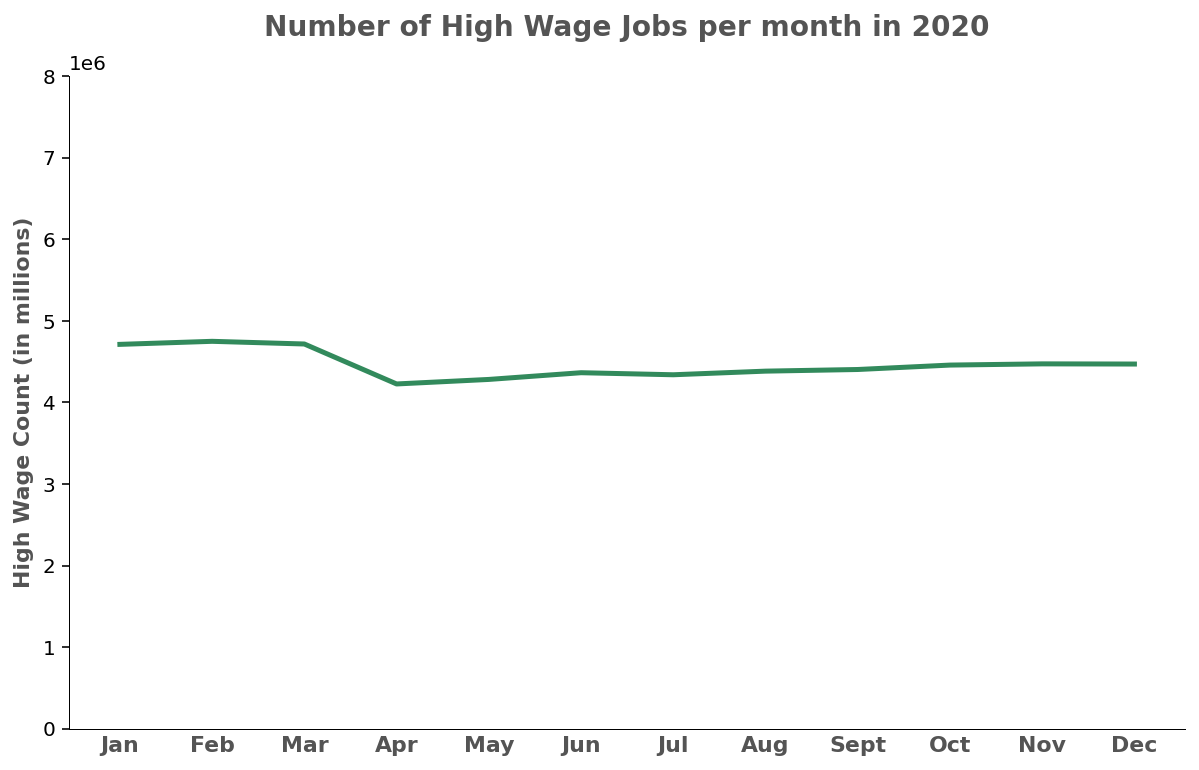

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Number of High Wage Jobs per month in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count (in millions)', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,8e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

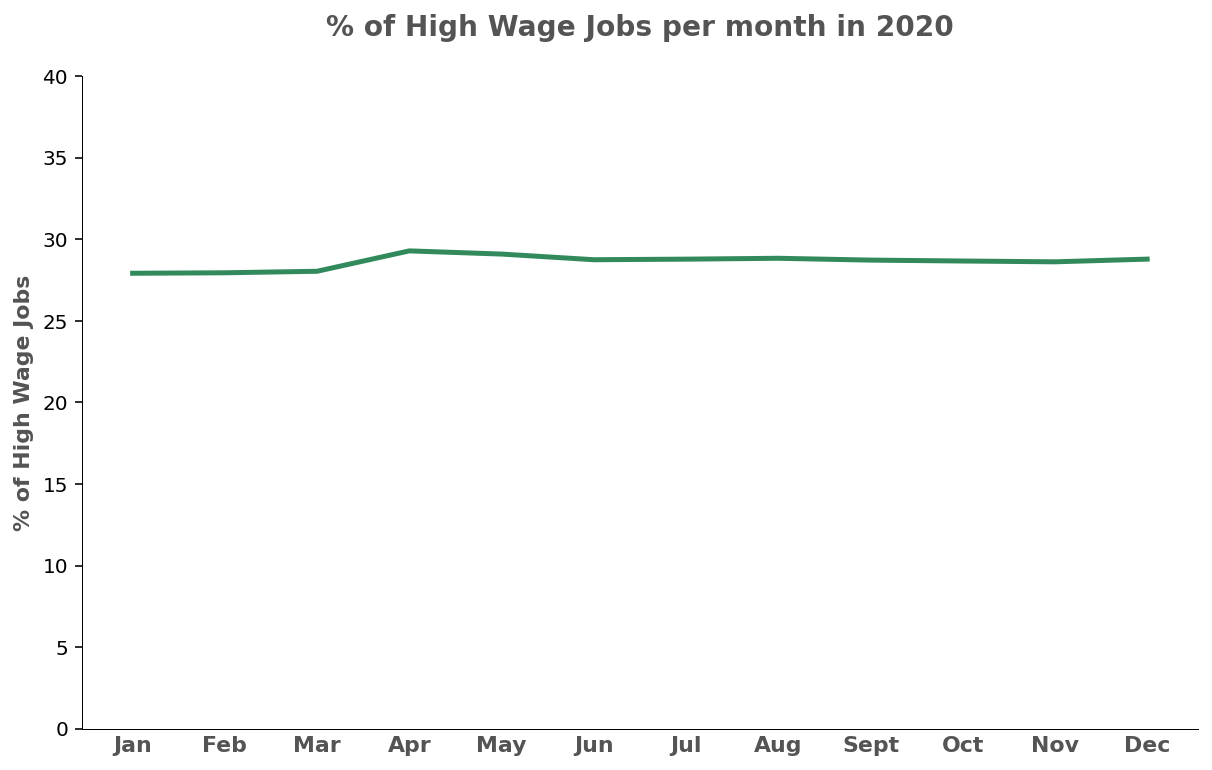

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'% of High Wage Jobs per month in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [26]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

High Wage Count  \
Industry                                                          
warehousing and storage                              254.000000   
mining and logging                                   586.431818   
personal and laundry services                       2026.666667   
total farm                                          2507.326389   
repair and maintenance                              2678.666667   
local government                                   37890.659722   
educational and health services                    51471.708333   
manufacturing                                      51588.625000   
health care and social assistance                  76499.520833   
professional scientific and technical services     84698.541667   

                                                Employment Count  \
Industry                                                           
warehousing and storage                              2158.333333   
mining and logging                                   1383.333333   
personal and laundry services                       39550.000000   
total farm                                          27698.611111   
repair and maintenance                              33483.333333   
local government                                   135536.111111   
educational and health services                    164154.166667   
manufacturing                                      111793.750000   
health care and social assistance                  290412.500000   
professional scientific and technical services     181461.111111   

                                                Cost of Living  \
Industry                                                         
warehousing and storage                           77956.000000   
mining and logging                                70435.909091   
personal and laundry services                     80216.000000   
total farm                                        69410.250000   
repair and maintenance                            80216.000000   
local government                                  69410.250000   
educational and health services                   68381.000000   
manufacturing                                     69069.750000   
health care and social assistance                 71468.750000   
professional scientific and technical services    76846.666667   

                                                Region Population  
Industry                                                           
warehousing and storage                              3.496774e+06  
mining and logging                                   3.489183e+06  
personal and laundry services                        1.008157e+07  
total farm                                           3.257897e+06  
repair and maintenance                               1.008157e+07  
local government                                     3.257897e+06  
educational and health services                      2.549630e+06  
manufacturing                                        3.122716e+06  
health care and social assistance                    4.674431e+06  
professional scientific and technical services       4.984088e+06

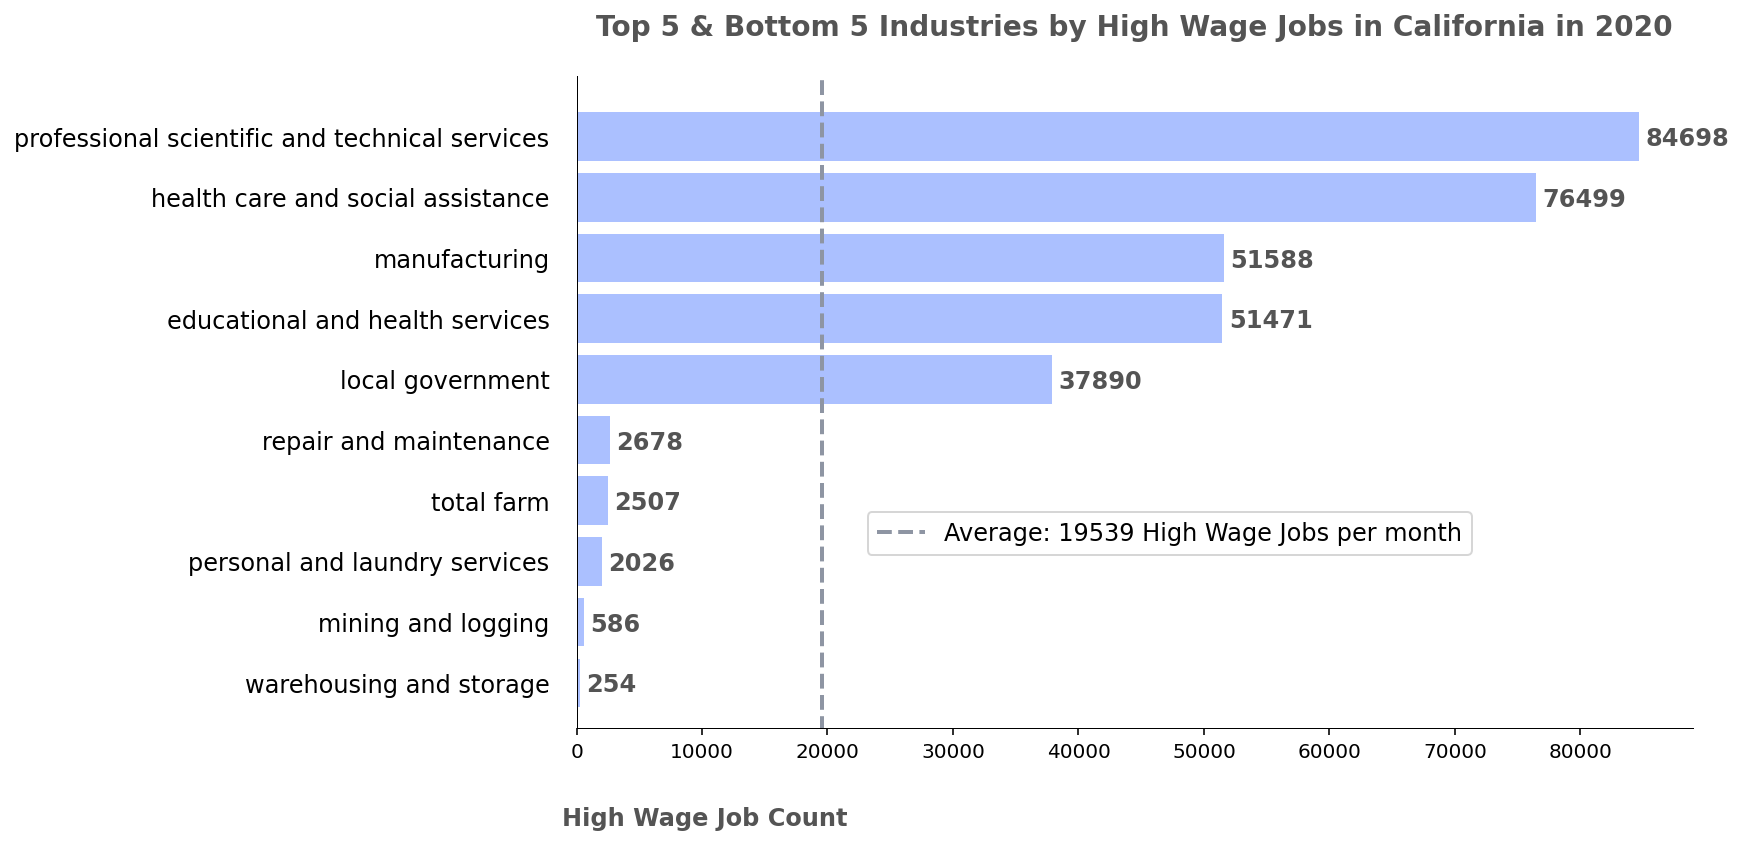

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title(f'Top 5 & Bottom 5 Industries by High Wage Jobs in California in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_state_industry_cut)):
    ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[i])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[i])+500, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in specified year per region

In [28]:
hw_regions = data.groupby(by=["Region", "Date"]).sum().groupby(by=['Region']).mean().sort_values(by='High Wage Count')
hw_regions['Percentage'] = (hw_regions['High Wage Count'] / hw_regions['Employment Count']) * 100
hw_regions

High Wage Count  Employment Count  Cost of Living  \
Region                                                                    
Redwood Coast            1.316833e+04      4.761667e+04        879195.0   
North State              5.101975e+04      1.426250e+05        871920.0   
Kern                     1.099500e+05      3.422750e+05       1261826.0   
Northern San Joaquin     1.779282e+05      5.354500e+05        982685.0   
Central San Joaquin      1.904941e+05      6.560500e+05       1008000.0   
Central Coast            1.948385e+05      7.461667e+05       1329400.0   
Sacramento               3.834316e+05      9.783333e+05        883358.0   
Orange                   3.858108e+05      1.526550e+06       2015904.0   
San Diego-Imperial       3.898660e+05      1.450100e+06       1637076.0   
Inland Empire            4.015203e+05      1.492417e+06       1262980.0   
Los Angeles              9.434084e+05      4.152692e+06       1925184.0   
Bay Area                 1.223690e+06      3.540292e+06       1750482.0   

                      Region Population  Percentage  
Region                                               
Redwood Coast                 4722810.0   27.654883  
North State                  10706310.0   35.771954  
Kern                         20415743.0   32.123293  
Northern San Joaquin         26472043.0   33.229651  
Central San Joaquin          31545774.0   29.036519  
Central Coast                39814085.0   26.111928  
Sacramento                   35138642.0   39.192325  
Orange                       72865012.0   25.273378  
San Diego-Imperial           73432254.0   26.885456  
Inland Empire                91209400.0   26.904037  
Los Angeles                 241957680.0   22.717998  
Bay Area                    138780468.0   34.564655

In [29]:
hw_regions_perc_sorted = hw_regions.sort_values(by='Percentage')
hw_regions_perc_sorted

High Wage Count  Employment Count  Cost of Living  \
Region                                                                    
Los Angeles              9.434084e+05      4.152692e+06       1925184.0   
Orange                   3.858108e+05      1.526550e+06       2015904.0   
Central Coast            1.948385e+05      7.461667e+05       1329400.0   
San Diego-Imperial       3.898660e+05      1.450100e+06       1637076.0   
Inland Empire            4.015203e+05      1.492417e+06       1262980.0   
Redwood Coast            1.316833e+04      4.761667e+04        879195.0   
Central San Joaquin      1.904941e+05      6.560500e+05       1008000.0   
Kern                     1.099500e+05      3.422750e+05       1261826.0   
Northern San Joaquin     1.779282e+05      5.354500e+05        982685.0   
Bay Area                 1.223690e+06      3.540292e+06       1750482.0   
North State              5.101975e+04      1.426250e+05        871920.0   
Sacramento               3.834316e+05      9.783333e+05        883358.0   

                      Region Population  Percentage  
Region                                               
Los Angeles                 241957680.0   22.717998  
Orange                       72865012.0   25.273378  
Central Coast                39814085.0   26.111928  
San Diego-Imperial           73432254.0   26.885456  
Inland Empire                91209400.0   26.904037  
Redwood Coast                 4722810.0   27.654883  
Central San Joaquin          31545774.0   29.036519  
Kern                         20415743.0   32.123293  
Northern San Joaquin         26472043.0   33.229651  
Bay Area                    138780468.0   34.564655  
North State                  10706310.0   35.771954  
Sacramento                   35138642.0   39.192325

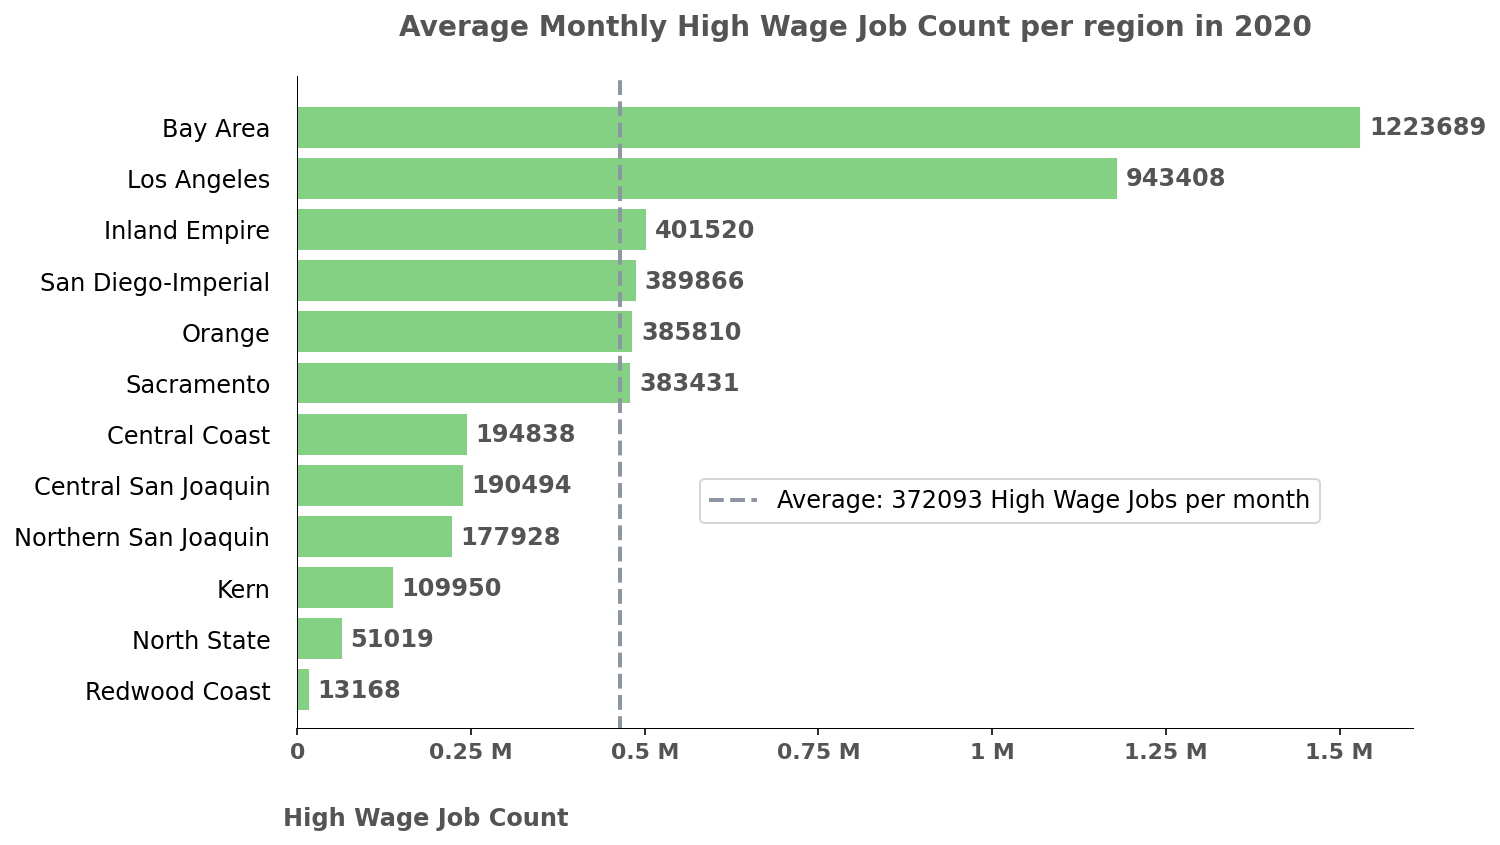

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Monthly High Wage Job Count per region in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_regions)):
    ax.annotate(f"{int(hw_regions['High Wage Count'].values[i])}", 
            (int(hw_regions['High Wage Count'].values[i])+10000, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.35, 0.4), loc='upper left', fontsize=12)
plt.show()

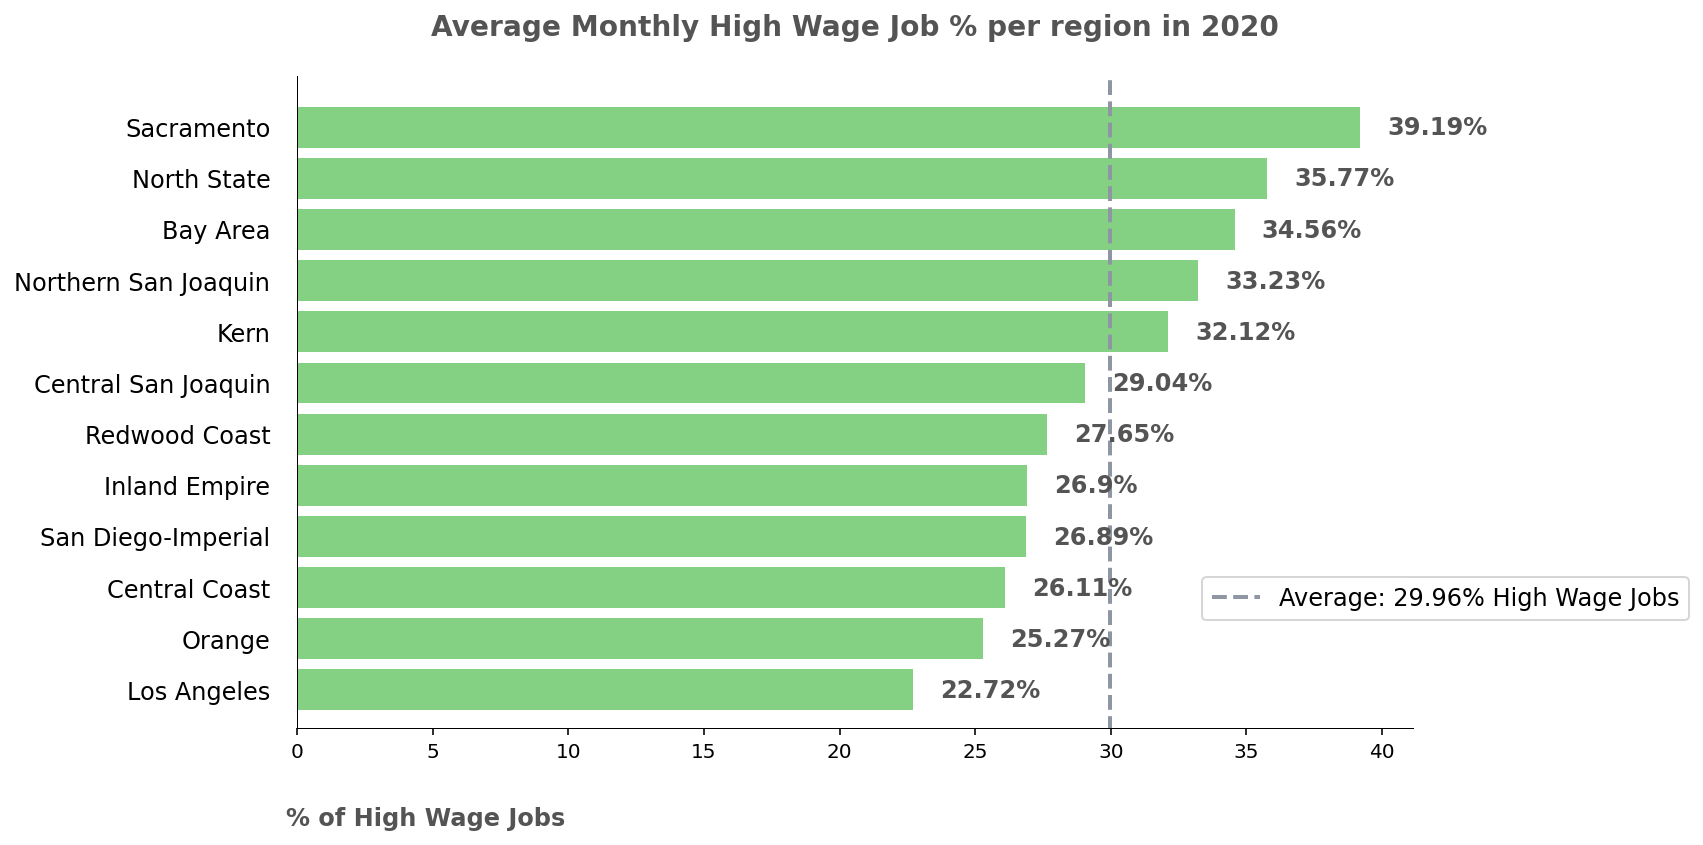

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), hw_regions_perc_sorted['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(hw_regions_perc_sorted.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(hw_regions_perc_sorted['Percentage'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Monthly High Wage Job % per region in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_regions_perc_sorted)):
    ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[i], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[i]+1, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.8, 0.25), loc='upper left', fontsize=12)
plt.show()

In [32]:
kern_data = data.loc[data['Region'] == 'Kern']
csj_data = data.loc[data['Region'] == 'Central San Joaquin']
nsj_data = data.loc[data['Region'] == 'Northern San Joaquin']
ns_data = data.loc[data['Region'] == 'North State']
rc_data = data.loc[data['Region'] == 'Redwood Coast']
sd_data = data.loc[data['Region'] == 'San Diego-Imperial']
orange_data = data.loc[data['Region'] == 'Orange']
ie_data = data.loc[data['Region'] == 'Inland Empire']
cc_data = data.loc[data['Region'] == 'Central Coast']
bay_data = data.loc[data['Region'] == 'Bay Area']
sac_data = data.loc[data['Region'] == 'Sacramento']
la_data = data.loc[data['Region'] == 'Los Angeles']

In [33]:
hw_kern = kern_data.groupby(by=["Date"]).sum()
hw_kern['Percentage'] = (hw_kern['High Wage Count'] / hw_kern['Employment Count']) * 100
hw_csj = csj_data.groupby(by=["Date"]).sum()
hw_csj['Percentage'] = (hw_csj['High Wage Count'] / hw_csj['Employment Count']) * 100
hw_nsj = nsj_data.groupby(by=["Date"]).sum()
hw_nsj['Percentage'] = (hw_nsj['High Wage Count'] / hw_nsj['Employment Count']) * 100
hw_ns = ns_data.groupby(by=["Date"]).sum()
hw_ns['Percentage'] = (hw_ns['High Wage Count'] / hw_ns['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

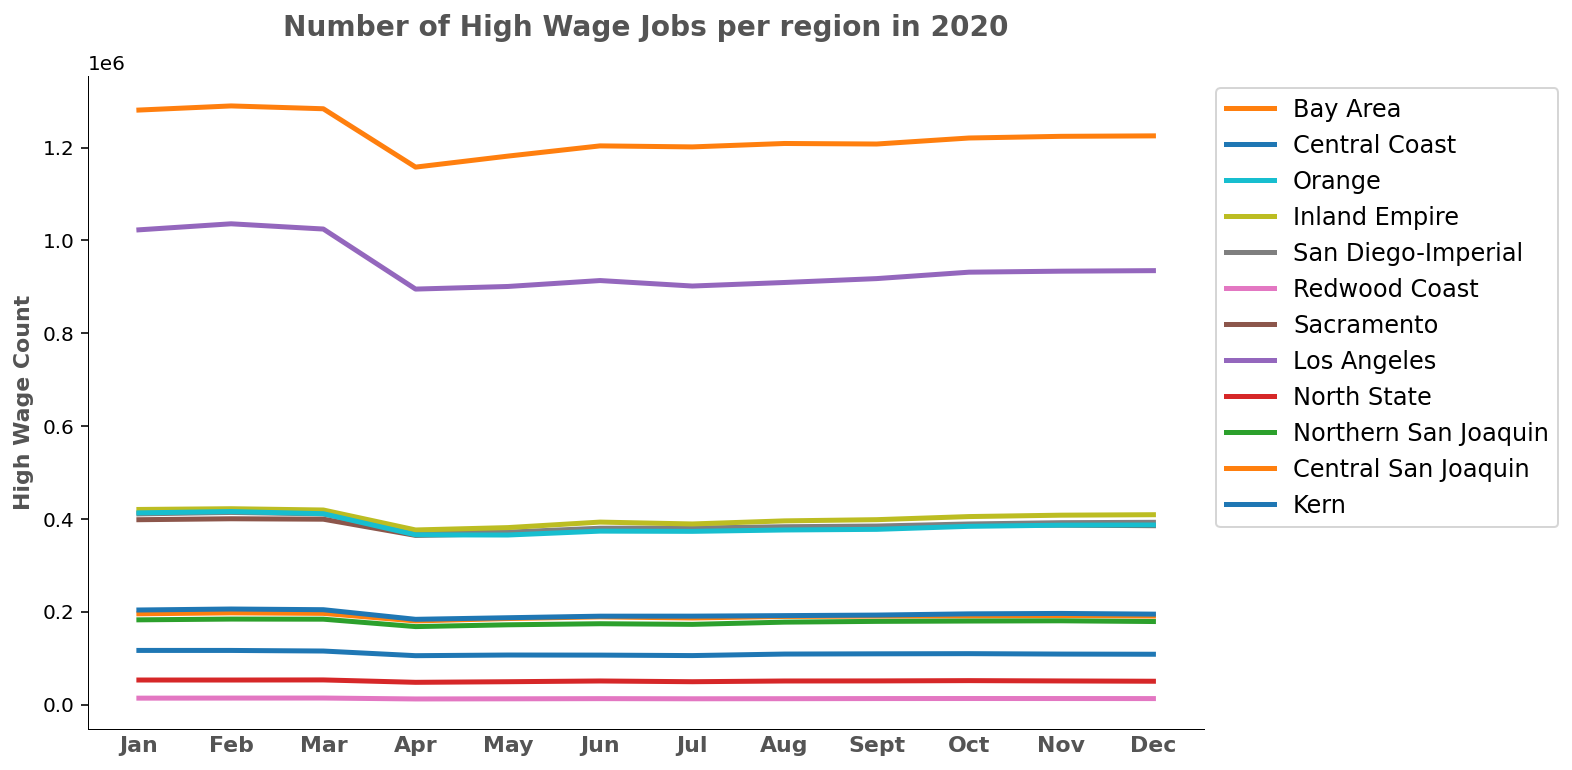

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['High Wage Count'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['High Wage Count'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['High Wage Count'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['High Wage Count'].values, lw=2.5, label='North State')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Number of High Wage Jobs per region in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

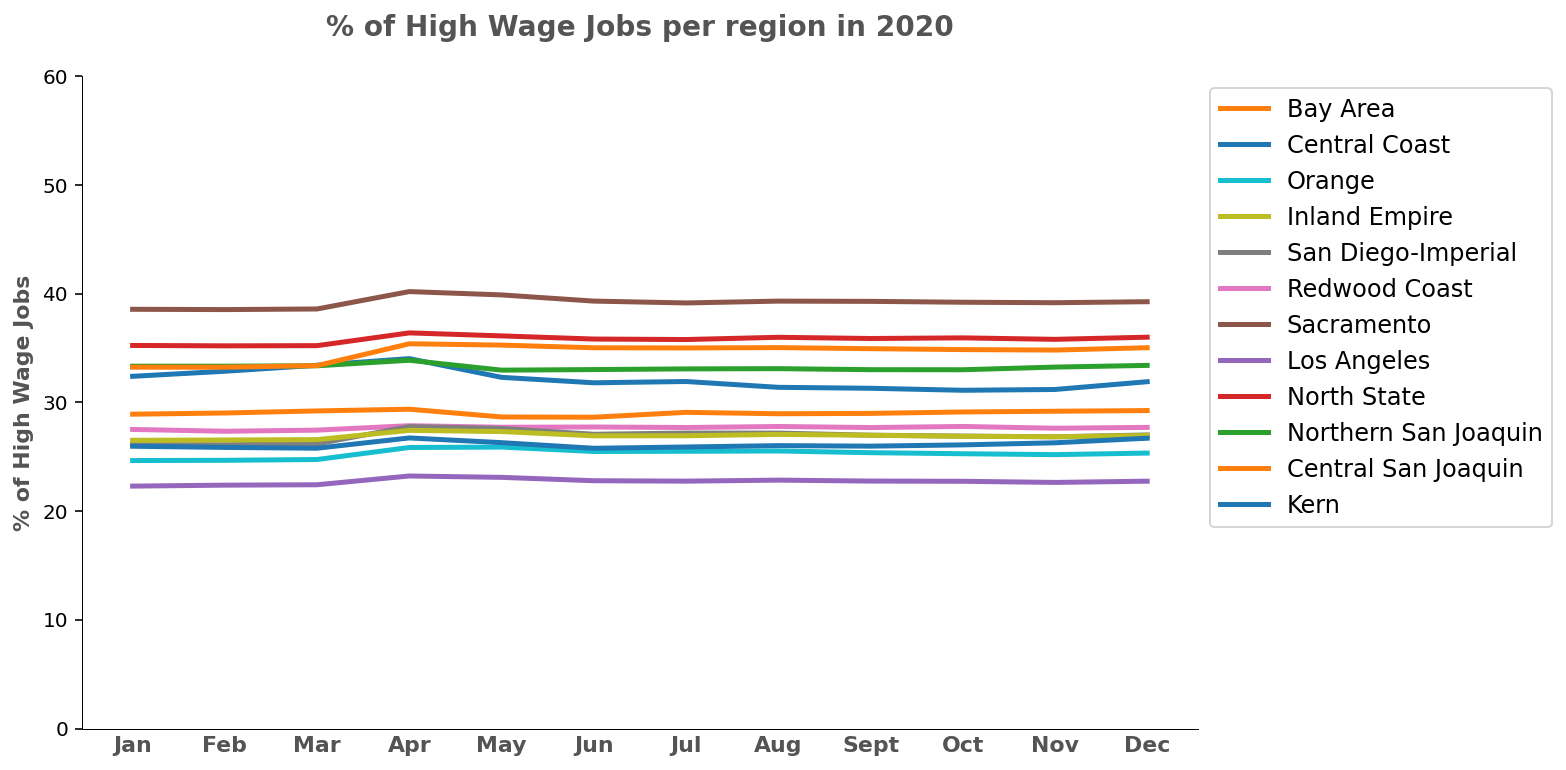

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['Percentage'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['Percentage'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['Percentage'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['Percentage'].values, lw=2.5, label='North State')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'% of High Wage Jobs per region in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 60)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### High Wage Jobs per 100,000 People

In [36]:
region_pop = county_info.groupby(by=['CERF Regions']).sum()[['Population']].reset_index()

In [37]:
percapita = data.copy()

In [38]:
percapita = percapita.groupby(by=['Region', 'Date']).sum()[['High Wage Count', 'Employment Count']].reset_index()

In [39]:
percapita = pd.merge(percapita, region_pop, left_on='Region', right_on='CERF Regions')

In [40]:
percapita['Per 100k'] = (percapita['High Wage Count'] / percapita['Population']) * 100000

In [41]:
percapita.head()

Region        Date  High Wage Count  Employment Count CERF Regions  \
0  Bay Area  2020-01-01          1280726         3852800.0     Bay Area   
1  Bay Area  2020-02-01          1289617         3879800.0     Bay Area   
2  Bay Area  2020-03-01          1283553         3844100.0     Bay Area   
3  Bay Area  2020-04-01          1157843         3271100.0     Bay Area   
4  Bay Area  2020-05-01          1181511         3349600.0     Bay Area   

   Population      Per 100k  
0     7710026  16611.176149  
1     7710026  16726.493529  
2     7710026  16647.842692  
3     7710026  15017.368294  
4     7710026  15324.345210

In [42]:
kern_percapita = percapita.loc[percapita['Region'] == 'Kern']
csj_percapita = percapita.loc[percapita['Region'] == 'Central San Joaquin']
nsj_percapita = percapita.loc[percapita['Region'] == 'Northern San Joaquin']
ns_percapita = percapita.loc[percapita['Region'] == 'North State']
rc_percapita = percapita.loc[percapita['Region'] == 'Redwood Coast']
sd_percapita = percapita.loc[percapita['Region'] == 'San Diego-Imperial']
orange_percapita = percapita.loc[percapita['Region'] == 'Orange']
ie_percapita = percapita.loc[percapita['Region'] == 'Inland Empire']
cc_percapita = percapita.loc[percapita['Region'] == 'Central Coast']
bay_percapita = percapita.loc[percapita['Region'] == 'Bay Area']
sac_percapita = percapita.loc[percapita['Region'] == 'Sacramento']
la_percapita = percapita.loc[percapita['Region'] == 'Los Angeles']

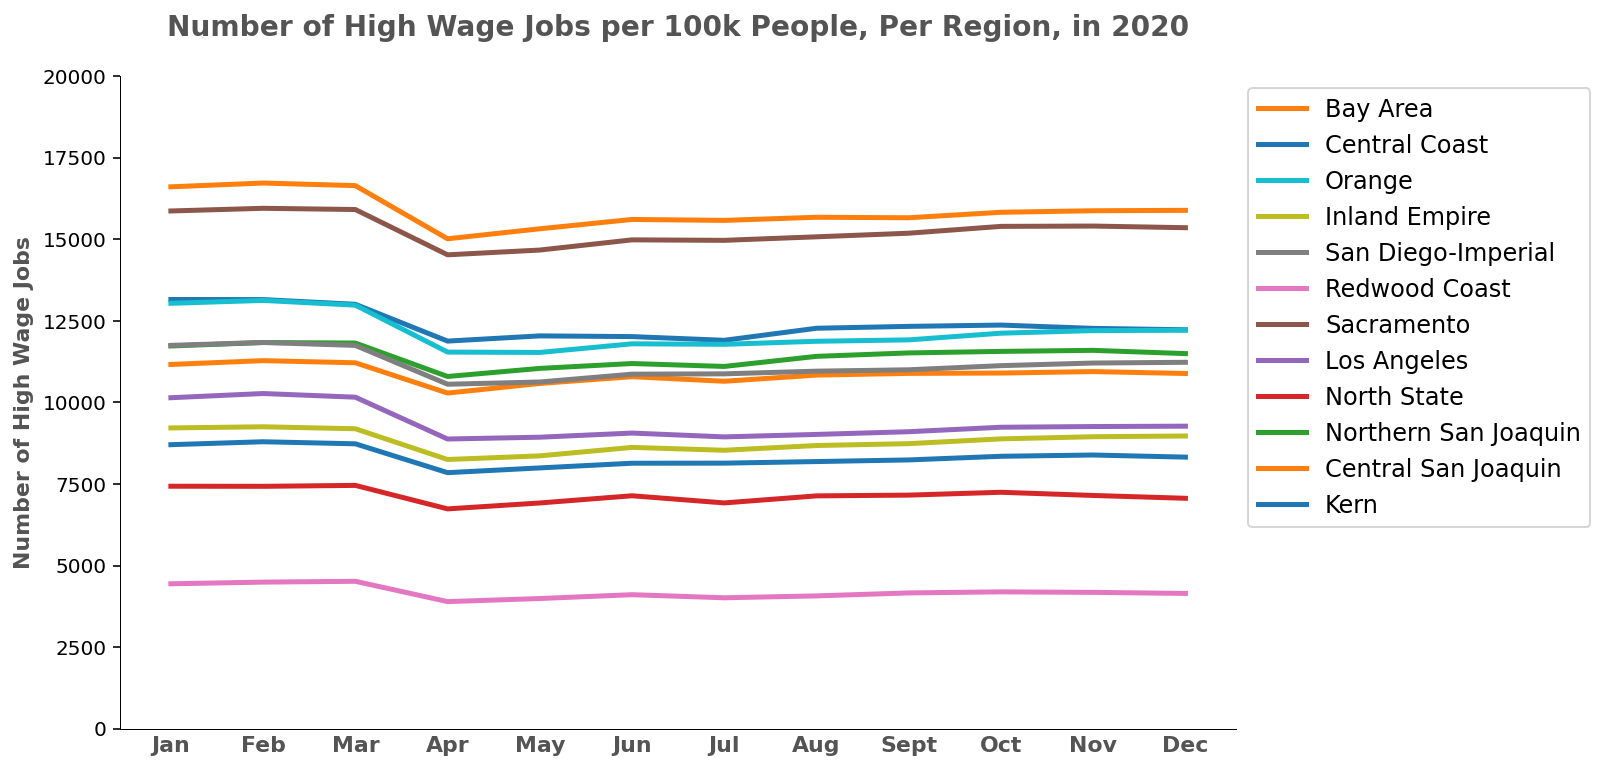

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(kern_percapita['Per 100k'].values, lw=2.5, label='Kern')
ax.plot(csj_percapita['Per 100k'].values, lw=2.5, label='Central San Joaquin')
ax.plot(nsj_percapita['Per 100k'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(ns_percapita['Per 100k'].values, lw=2.5, label='North State')
ax.plot(la_percapita['Per 100k'].values, lw=2.5, label='Los Angeles')
ax.plot(sac_percapita['Per 100k'].values, lw=2.5, label='Sacramento')
ax.plot(rc_percapita['Per 100k'].values, lw=2.5, label='Redwood Coast')
ax.plot(sd_percapita['Per 100k'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(ie_percapita['Per 100k'].values, lw=2.5, label='Inland Empire')
ax.plot(orange_percapita['Per 100k'].values, lw=2.5, label='Orange')
ax.plot(cc_percapita['Per 100k'].values, lw=2.5, label='Central Coast')
ax.plot(bay_percapita['Per 100k'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Number of High Wage Jobs per 100k People, Per Region, in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Number of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 20000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

In [44]:
percapita_mean = percapita.groupby(by='Region').mean().sort_values('Per 100k')

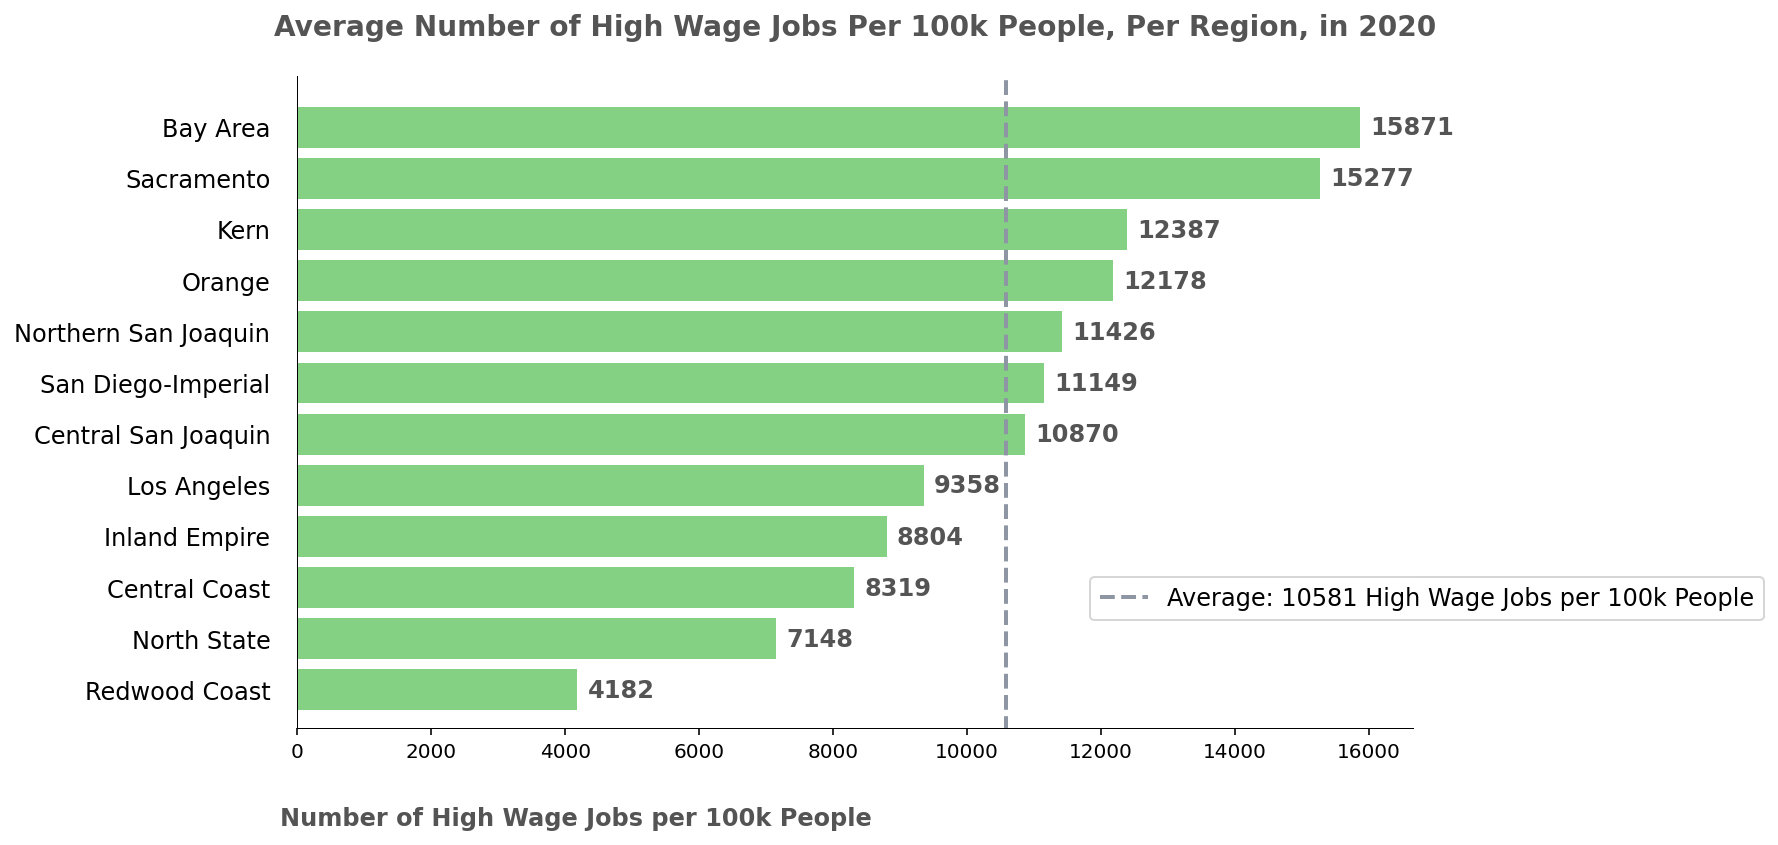

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), percapita_mean['Per 100k'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(percapita_mean.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of High Wage Jobs per 100k People", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.25, -0.12)

mean_val = round(percapita_mean['Per 100k'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per 100k People')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Number of High Wage Jobs Per 100k People, Per Region, in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(percapita_mean)):
    ax.annotate(f"{round(percapita_mean['Per 100k'].values[i])}", 
            (round(percapita_mean['Per 100k'].values[i])+150, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.7, 0.25), loc='upper left', fontsize=12)
plt.show()

### Tree Plot

In [46]:
hw_regions = hw_regions.sort_values('High Wage Count', ascending=False)
hw_regions

High Wage Count  Employment Count  Cost of Living  \
Region                                                                    
Bay Area                 1.223690e+06      3.540292e+06       1750482.0   
Los Angeles              9.434084e+05      4.152692e+06       1925184.0   
Inland Empire            4.015203e+05      1.492417e+06       1262980.0   
San Diego-Imperial       3.898660e+05      1.450100e+06       1637076.0   
Orange                   3.858108e+05      1.526550e+06       2015904.0   
Sacramento               3.834316e+05      9.783333e+05        883358.0   
Central Coast            1.948385e+05      7.461667e+05       1329400.0   
Central San Joaquin      1.904941e+05      6.560500e+05       1008000.0   
Northern San Joaquin     1.779282e+05      5.354500e+05        982685.0   
Kern                     1.099500e+05      3.422750e+05       1261826.0   
North State              5.101975e+04      1.426250e+05        871920.0   
Redwood Coast            1.316833e+04      4.761667e+04        879195.0   

                      Region Population  Percentage  
Region                                               
Bay Area                    138780468.0   34.564655  
Los Angeles                 241957680.0   22.717998  
Inland Empire                91209400.0   26.904037  
San Diego-Imperial           73432254.0   26.885456  
Orange                       72865012.0   25.273378  
Sacramento                   35138642.0   39.192325  
Central Coast                39814085.0   26.111928  
Central San Joaquin          31545774.0   29.036519  
Northern San Joaquin         26472043.0   33.229651  
Kern                         20415743.0   32.123293  
North State                  10706310.0   35.771954  
Redwood Coast                 4722810.0   27.654883

In [47]:
dates = sorted(data['Date'].unique())

In [48]:
data_dec = data.loc[data['Date'] == dates[-1]]
data_dec['Percentage'] = (data_dec['High Wage Count'] / data_dec['Employment Count']) * 100
data_dec.head()

Industry        Date         Region  \
11                accommodation and food services  2020-12-01  Inland Empire   
23  administrative and support and waste services  2020-12-01  Inland Empire   
35              arts entertainment and recreation  2020-12-01  Inland Empire   
47                                   construction  2020-12-01  Inland Empire   
59                                  durable goods  2020-12-01  Inland Empire   

    High Wage Count  Employment Count  Cost of Living  Region Population  \
11            10567          115300.0           63149            4560470   
23            26479          106500.0           63149            4560470   
35             1814           11600.0           63149            4560470   
47            37828          109500.0           63149            4560470   
59            21521           56800.0           63149            4560470   

    Percentage  
11    9.164788  
23   24.862911  
35   15.637931  
47   34.546119  
59   37.889085

In [49]:
fig = px.treemap(data_dec, 
                 path=[px.Constant('California'), 'Region'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.show()

### Job Creation Numbers

In [50]:
data.head()

Industry        Date         Region  \
0  accommodation and food services  2020-01-01  Inland Empire   
1  accommodation and food services  2020-02-01  Inland Empire   
2  accommodation and food services  2020-03-01  Inland Empire   
3  accommodation and food services  2020-04-01  Inland Empire   
4  accommodation and food services  2020-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living  Region Population  
0            14133          154200.0           63149            4560470  
1            14371          156800.0           63149            4560470  
2            14105          153900.0           63149            4560470  
3             8762           95600.0           63149            4560470  
4             9394          102500.0           63149            4560470

In [51]:
data_jobcreation = data.groupby(by=['Region', 'Date']).sum()[['High Wage Count']]
data_jobcreation['Job Creation'] = data_jobcreation['High Wage Count'].diff()
data_jobcreation = data_jobcreation.reset_index()
data_jobcreation = data_jobcreation.loc[data_jobcreation['Date'] != dates[0]]
data_jobcreation.head()

Region        Date  High Wage Count  Job Creation
1  Bay Area  2020-02-01          1289617        8891.0
2  Bay Area  2020-03-01          1283553       -6064.0
3  Bay Area  2020-04-01          1157843     -125710.0
4  Bay Area  2020-05-01          1181511       23668.0
5  Bay Area  2020-06-01          1203563       22052.0

In [52]:
state_jc = data_jobcreation.groupby(by=['Date']).sum()

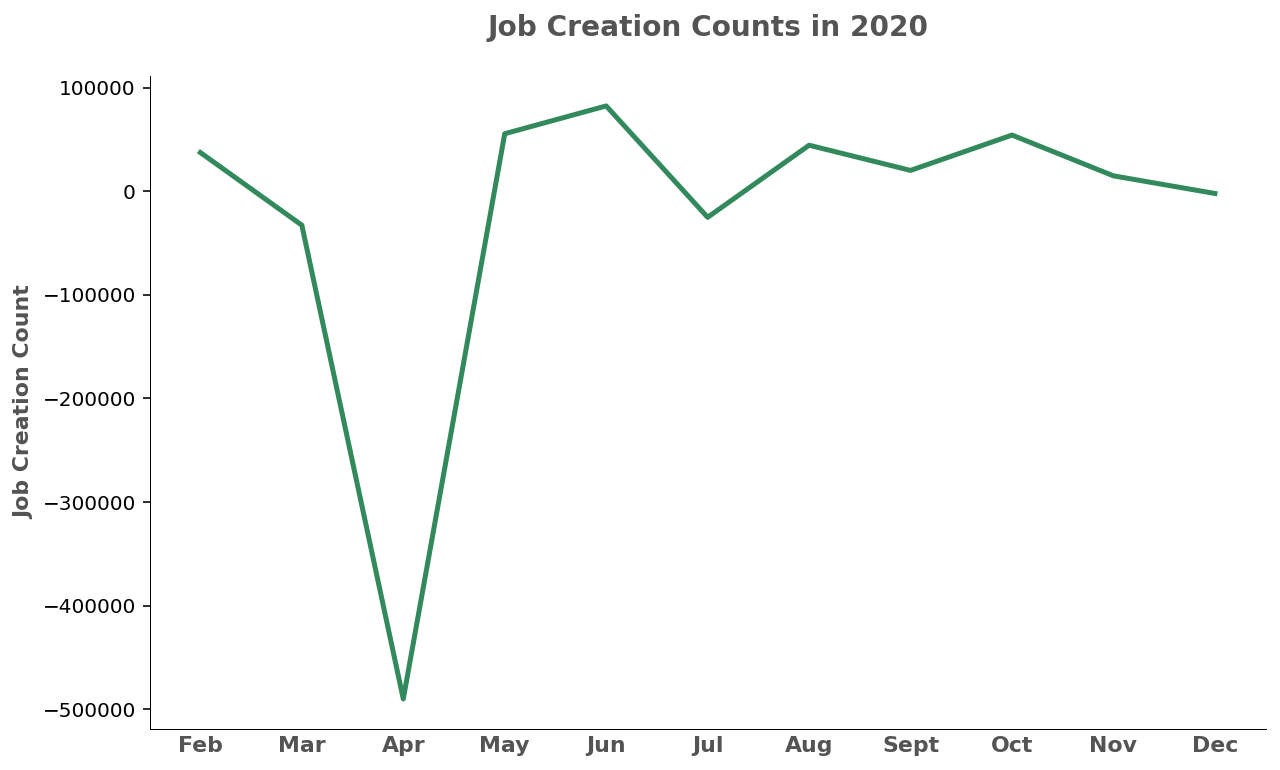

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(state_jc['Job Creation'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Job Creation Counts in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 11, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [54]:
regions_jc = data_jobcreation.groupby(by=['Region']).mean().sort_values('Job Creation')

In [55]:
regions_jc

High Wage Count  Job Creation
Region                                             
Los Angeles              9.361981e+05  -7991.090909
Bay Area                 1.218504e+06  -5054.909091
Orange                   3.833305e+05  -2378.090909
San Diego-Imperial       3.879573e+05  -1649.454545
Sacramento               3.820769e+05  -1170.272727
Inland Empire            3.998022e+05  -1027.272727
Central Coast            1.940172e+05   -812.727273
Kern                     1.093290e+05   -748.909091
Central San Joaquin      1.900239e+05   -441.090909
Northern San Joaquin     1.774966e+05   -331.272727
North State              5.083618e+04   -239.727273
Redwood Coast            1.309464e+04    -84.545455

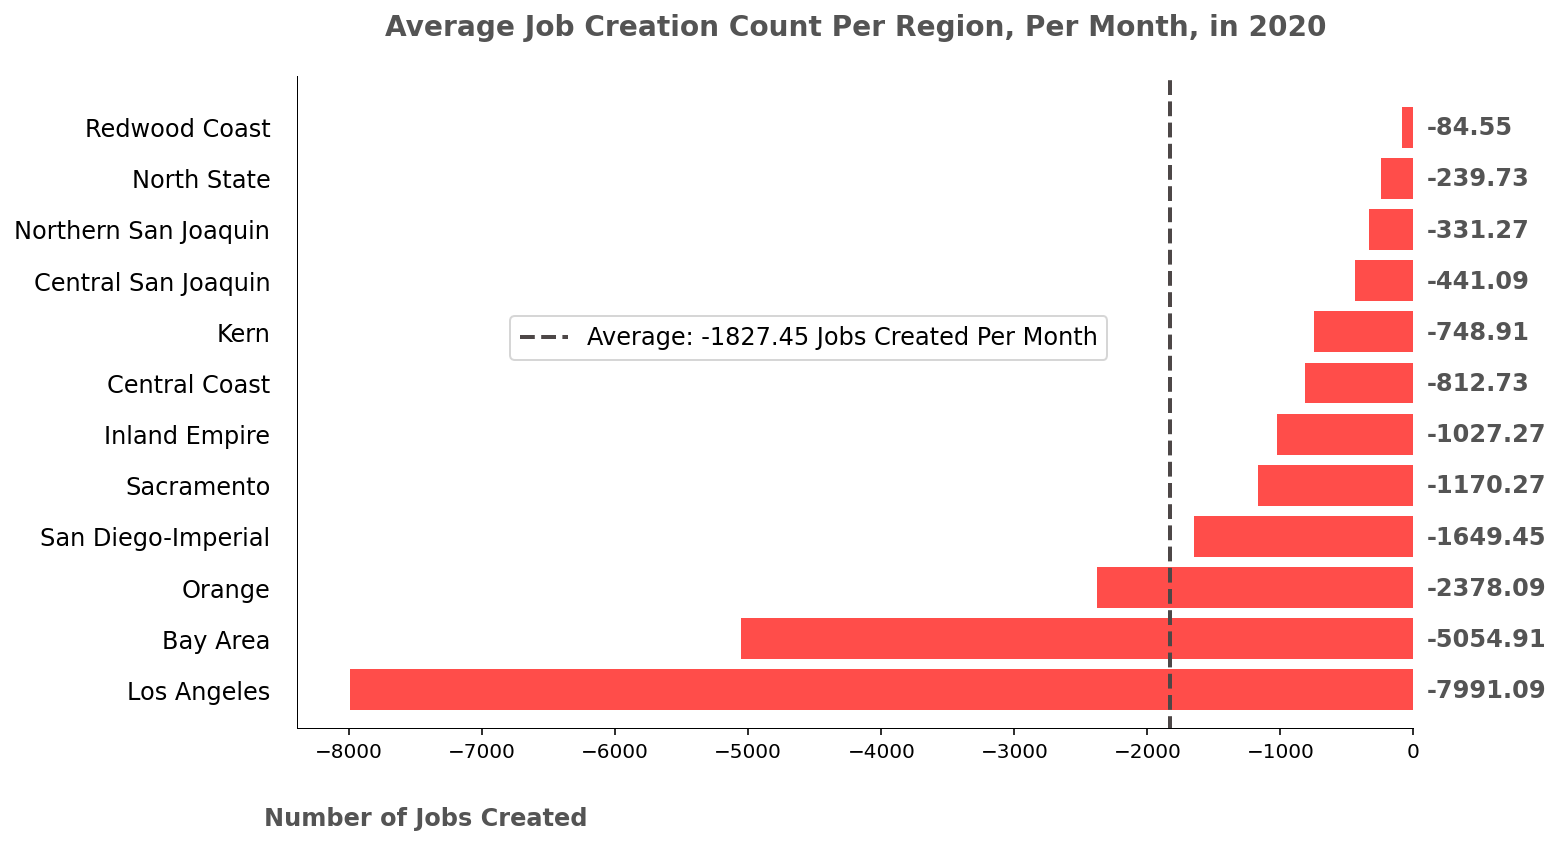

In [56]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), regions_jc['Job Creation'].values, color='#ff4d4a')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(regions_jc.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of Jobs Created", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(regions_jc['Job Creation'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#4d4747', lw=2, ls='dashed', label=f'Average: {mean_val} Jobs Created Per Month')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Job Creation Count Per Region, Per Month, in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(regions_jc)):
    ax.annotate(f"{round(regions_jc['Job Creation'].values[i], 2)}", 
            (100, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.18, 0.65), loc='upper left', fontsize=12)
plt.show()

In [57]:
kern_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Kern']
csj_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central San Joaquin']
nsj_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Northern San Joaquin']
ns_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'North State']
rc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Redwood Coast']
sd_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'San Diego-Imperial']
orange_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Orange']
ie_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Inland Empire']
cc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Coast']
bay_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Bay Area']
sac_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Sacramento']
la_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Los Angeles']

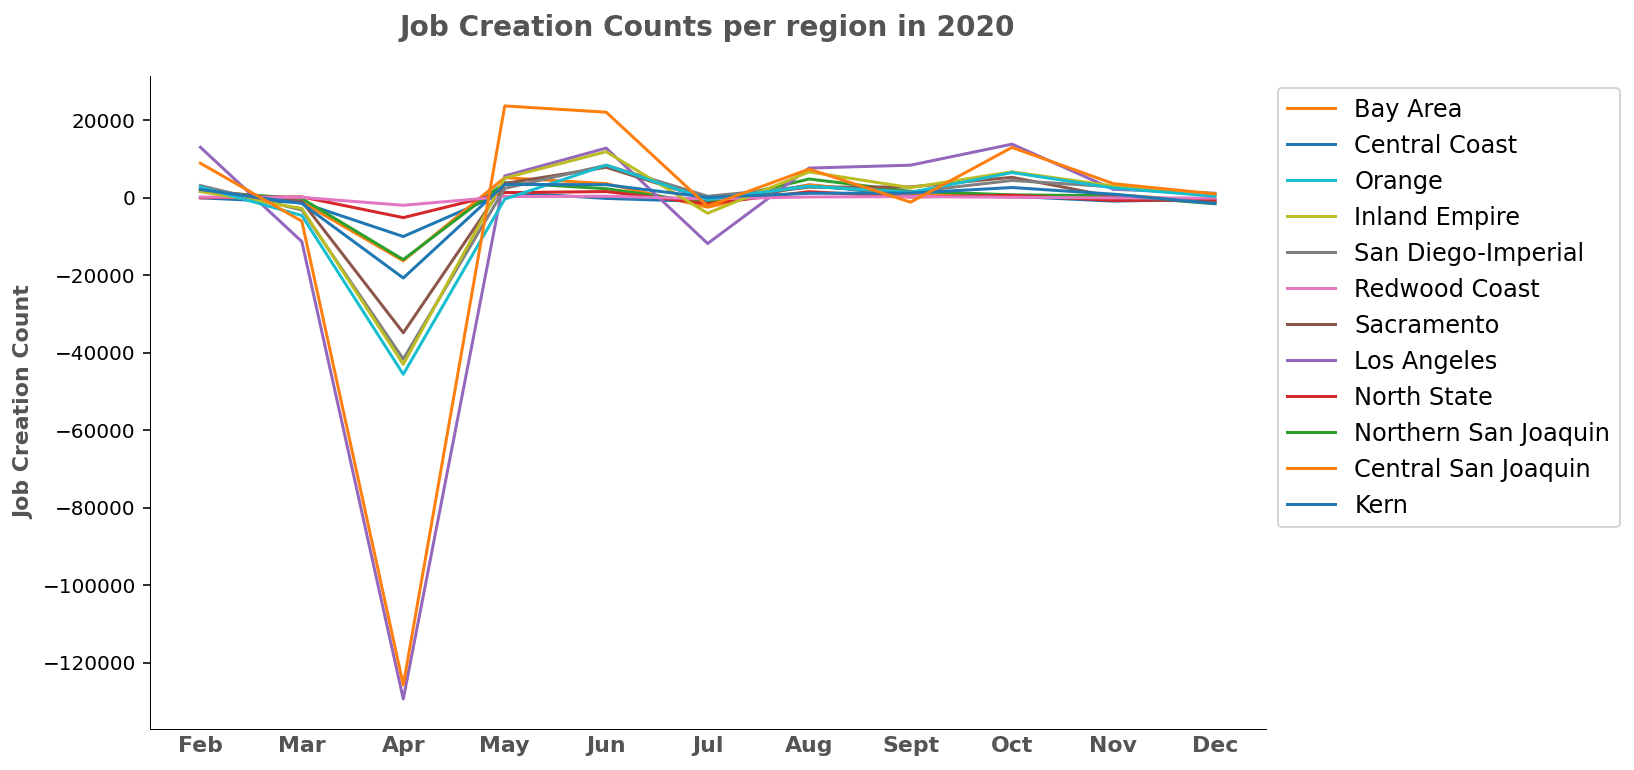

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(kern_jc['Job Creation'].values, label='Kern')
ax.plot(csj_jc['Job Creation'].values, label='Central San Joaquin')
ax.plot(nsj_jc['Job Creation'].values, label='Northern San Joaquin')
ax.plot(ns_jc['Job Creation'].values, label='North State')
ax.plot(la_jc['Job Creation'].values, label='Los Angeles')
ax.plot(sac_jc['Job Creation'].values, label='Sacramento')
ax.plot(rc_jc['Job Creation'].values, label='Redwood Coast')
ax.plot(sd_jc['Job Creation'].values, label='San Diego-Imperial')
ax.plot(ie_jc['Job Creation'].values, label='Inland Empire')
ax.plot(orange_jc['Job Creation'].values, label='Orange')
ax.plot(cc_jc['Job Creation'].values, label='Central Coast')
ax.plot(bay_jc['Job Creation'].values, label='Bay Area')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Job Creation Counts per region in {outputs_year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 11, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Racial demographics breakdown

In [59]:
data_demo = pd.read_csv(f'data/outputs/hw_outputs_w_race_{outputs_year}.csv')

In [60]:
data_demo.head()

Industry        Date         Region  \
0  accommodation and food services  2020-01-01  Inland Empire   
1  accommodation and food services  2020-02-01  Inland Empire   
2  accommodation and food services  2020-03-01  Inland Empire   
3  accommodation and food services  2020-04-01  Inland Empire   
4  accommodation and food services  2020-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living Output Race  \
0            29517          154200.0           63149       White   
1            30014          156800.0           63149       White   
2            29459          153900.0           63149       White   
3            18299           95600.0           63149       White   
4            19620          102500.0           63149       White   

   Region Population  
0            4560470  
1            4560470  
2            4560470  
3            4560470  
4            4560470

In [61]:
hw_race = data_demo.groupby(by=["Output Race", "Date"]).sum().groupby(by=['Output Race']).mean()
hw_race['Percentage'] = (hw_race['High Wage Count'] / hw_race['Employment Count']) * 100
hw_race = hw_race.sort_values(by='Percentage')

In [62]:
hw_race

High Wage Count  Employment Count  \
Output Race                                                        
Latino                            2.378937e+06      1.548849e+07   
Black                             2.755914e+06      1.408025e+07   
American Indian/Alaska Native     1.847429e+06      9.187008e+06   
Some other race                   1.887987e+06      8.984608e+06   
Multiracial                       4.663324e+06      1.438308e+07   
Asian                             5.109039e+06      1.501526e+07   
White                             6.097833e+06      1.556766e+07   

                               Cost of Living  Region Population  Percentage  
Output Race                                                                   
Latino                             15226116.0        782939994.0   15.359385  
Black                              12576499.0        705586369.0   19.572904  
American Indian/Alaska Native       8864727.0        523380840.0   20.109151  
Some other race                     6909315.0        473854906.0   21.013571  
Multiracial                        13501779.0        703061935.0   32.422284  
Asian                              14195449.0        760705578.0   34.025646  
White                              15752010.0        785307678.0   39.169881

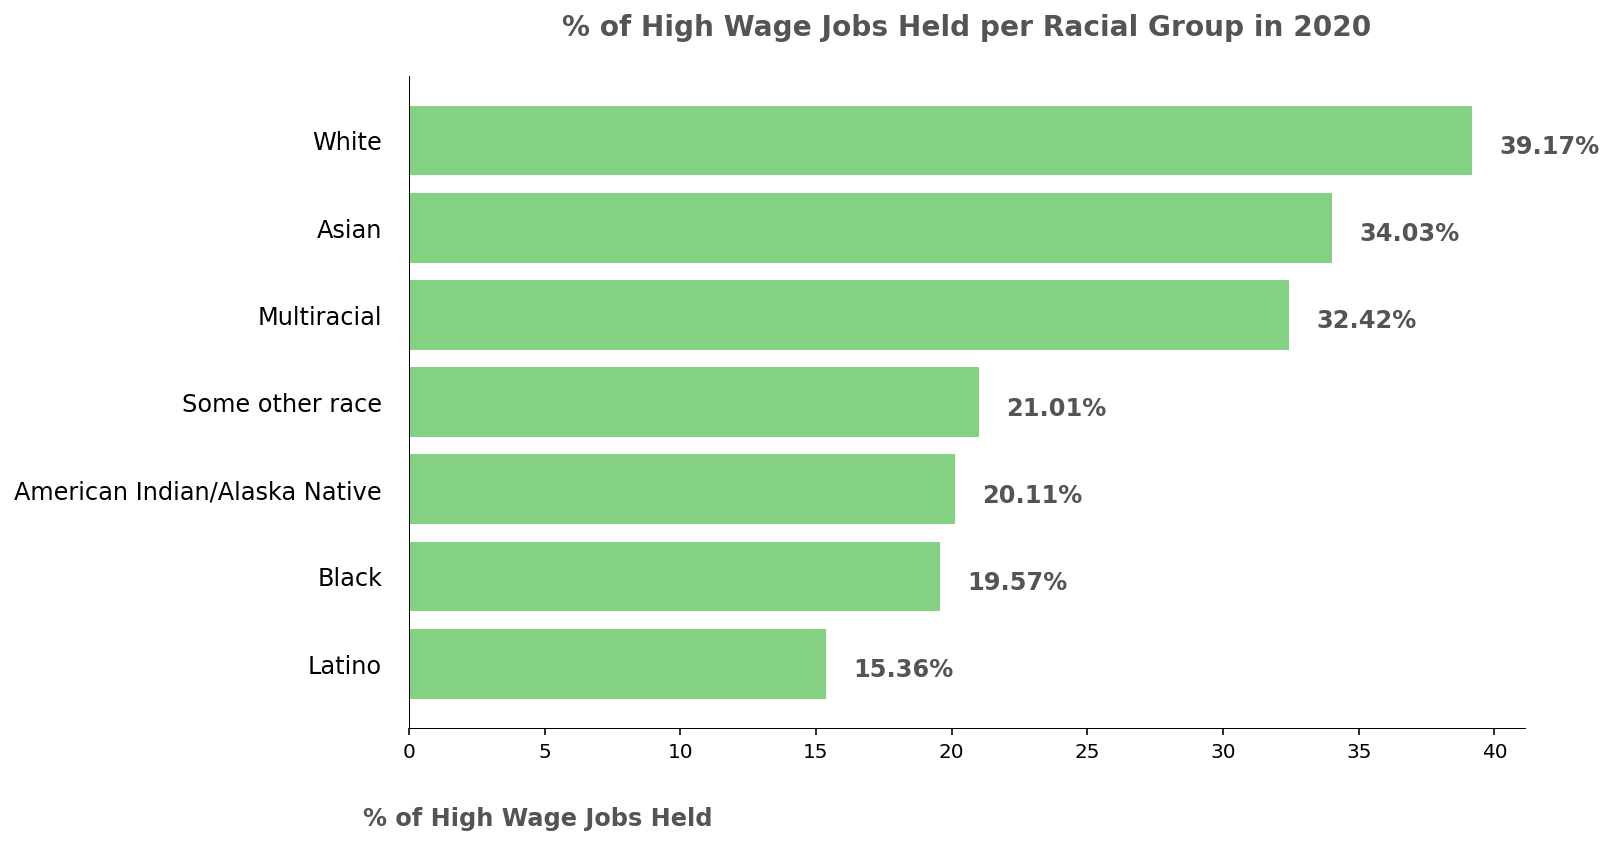

In [63]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(7), hw_race['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(7))
ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs Held", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.set_title(f'% of High Wage Jobs Held per Racial Group in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_race)):
    ax.annotate(f"{round(hw_race['Percentage'].values[i], 2)}%", 
            (hw_race['Percentage'].values[i]+1, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [64]:
hw_race = hw_race.sort_values(by=['High Wage Count'])

In [65]:
hw_race

High Wage Count  Employment Count  \
Output Race                                                        
American Indian/Alaska Native     1.847429e+06      9.187008e+06   
Some other race                   1.887987e+06      8.984608e+06   
Latino                            2.378937e+06      1.548849e+07   
Black                             2.755914e+06      1.408025e+07   
Multiracial                       4.663324e+06      1.438308e+07   
Asian                             5.109039e+06      1.501526e+07   
White                             6.097833e+06      1.556766e+07   

                               Cost of Living  Region Population  Percentage  
Output Race                                                                   
American Indian/Alaska Native       8864727.0        523380840.0   20.109151  
Some other race                     6909315.0        473854906.0   21.013571  
Latino                             15226116.0        782939994.0   15.359385  
Black                              12576499.0        705586369.0   19.572904  
Multiracial                        13501779.0        703061935.0   32.422284  
Asian                              14195449.0        760705578.0   34.025646  
White                              15752010.0        785307678.0   39.169881

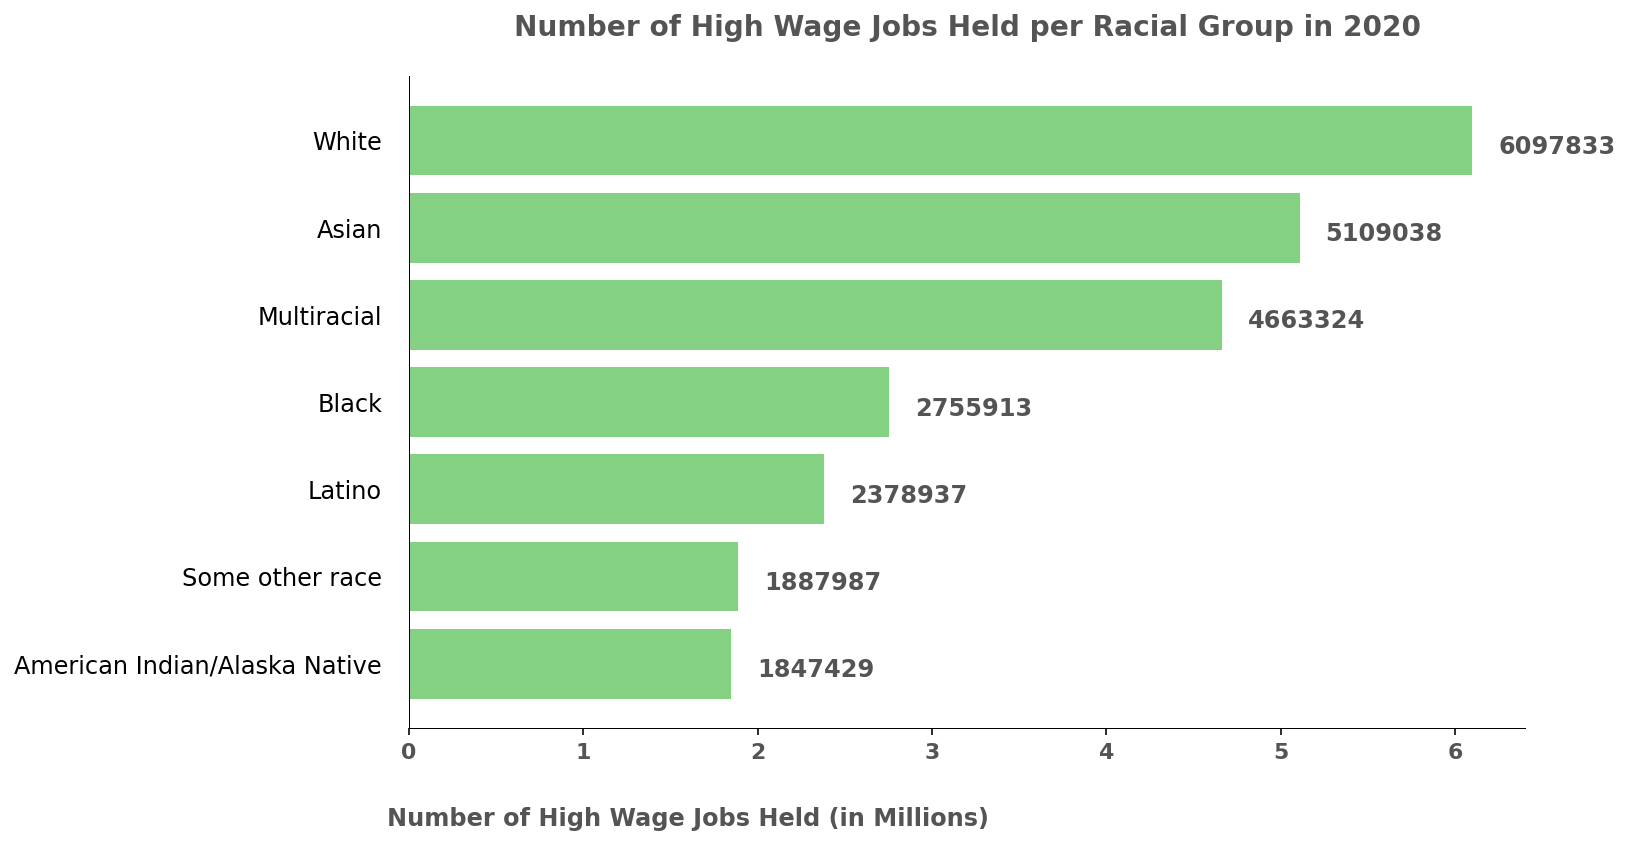

In [66]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(7), hw_race['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(7))
ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of High Wage Jobs Held (in Millions)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.25, -0.12)
ax.set_xticklabels(['0', '1','2','3','4','5','6', '7'], 
                   fontsize=11, weight='bold', color = '#545454')

ax.set_title(f'Number of High Wage Jobs Held per Racial Group in {outputs_year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_race)):
    ax.annotate(f"{int(hw_race['High Wage Count'].values[i])}", 
            (int(hw_race['High Wage Count'].values[i])+150000, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [67]:
fig = px.treemap(hw_race, 
                 path=[px.Constant('Total'), hw_race.index], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Multiyear Visualizations
### Currently showing years 2010-2022

In [68]:
hw_multiyear = pd.read_csv('data/outputs/hw_outputs_multiyear.csv')

In [69]:
hw_multiyear.head()

Industry        Date         Region  \
0  accommodation and food services  2010-01-01  Inland Empire   
1  accommodation and food services  2010-02-01  Inland Empire   
2  accommodation and food services  2010-03-01  Inland Empire   
3  accommodation and food services  2010-04-01  Inland Empire   
4  accommodation and food services  2010-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living  Region Population  Year  
0             9598          105200.0         54730.0            4560470  2010  
1             9644          105700.0         54730.0            4560470  2010  
2             9735          106700.0         54730.0            4560470  2010  
3             9890          108400.0         54730.0            4560470  2010  
4             9890          108400.0         54730.0            4560470  2010

In [70]:
hw_state = hw_multiyear.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100

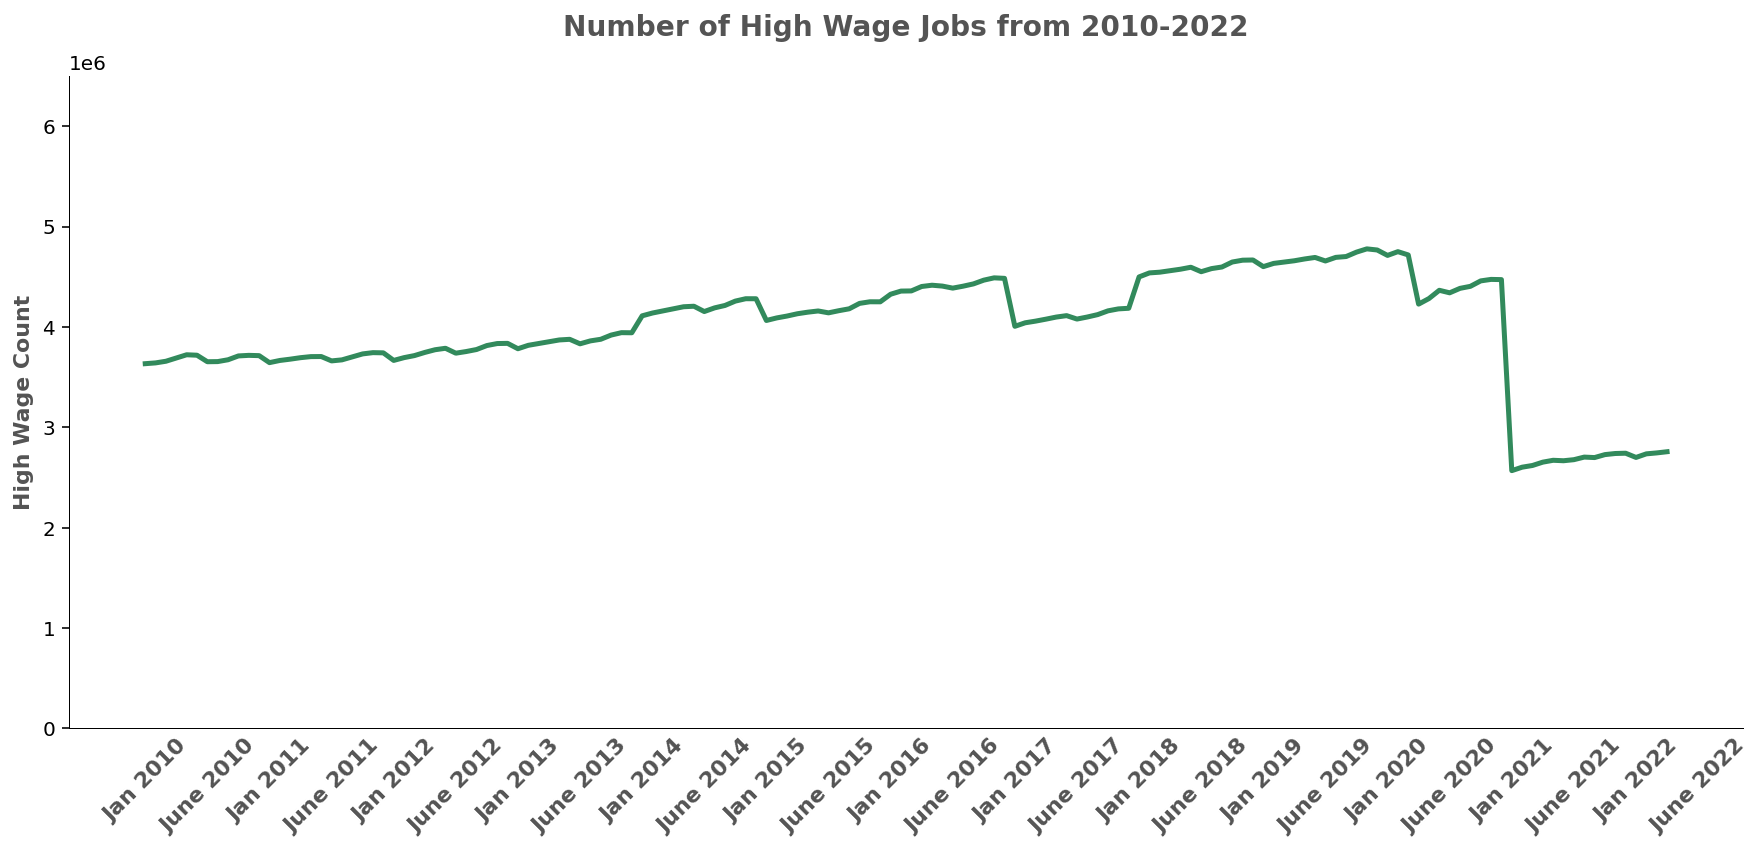

In [72]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

tick_labels = []
for year in np.arange(2010, 2023):
    tick_labels.append(f'Jan {year}')
    tick_labels.append(f'June {year}')

ax.set_xticklabels(tick_labels, 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Number of High Wage Jobs from 2010-2022', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, len(tick_labels) * 6, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,6.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

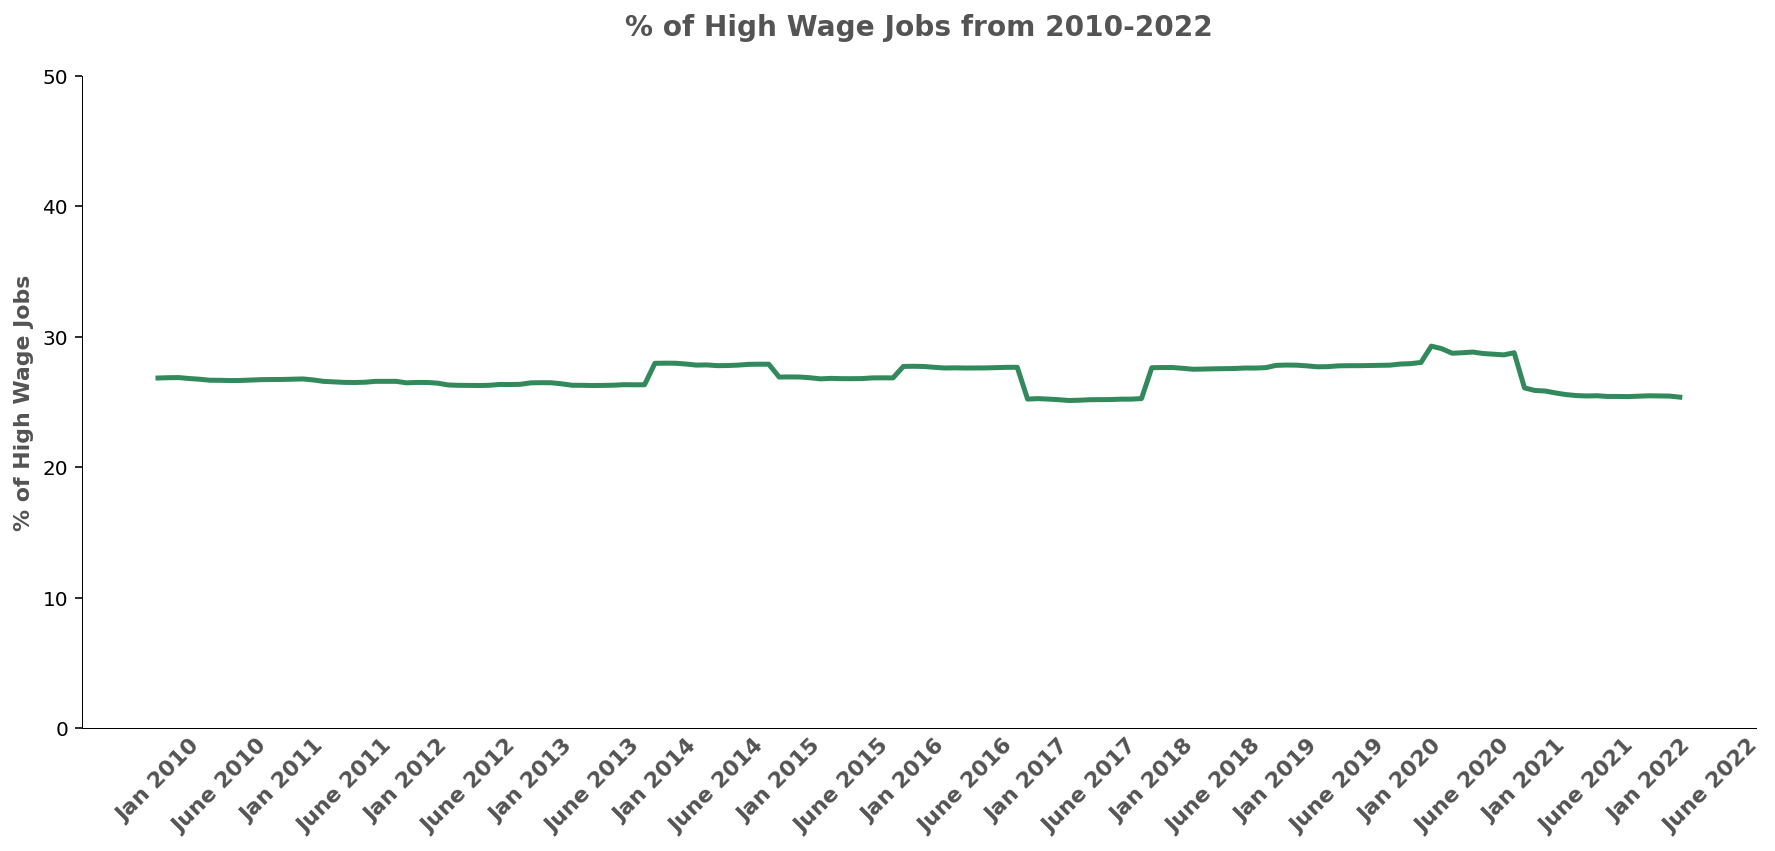

In [73]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

tick_labels = []
for year in np.arange(2010, 2023):
    tick_labels.append(f'Jan {year}')
    tick_labels.append(f'June {year}')

ax.set_xticklabels(tick_labels, 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('% of High Wage Jobs from 2010-2022', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, len(tick_labels) * 6, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [74]:
kern_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Kern']
csj_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Central San Joaquin']
nsj_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Northern San Joaquin']
ns_data = hw_multiyear.loc[hw_multiyear['Region'] == 'North State']
rc_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Redwood Coast']
sd_data = hw_multiyear.loc[hw_multiyear['Region'] == 'San Diego-Imperial']
orange_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Orange']
ie_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Inland Empire']
cc_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Central Coast']
bay_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Bay Area']
sac_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Sacramento']
la_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Los Angeles']

In [75]:
hw_kern = kern_data.groupby(by=["Date"]).sum()
hw_kern['Percentage'] = (hw_kern['High Wage Count'] / hw_kern['Employment Count']) * 100
hw_csj = csj_data.groupby(by=["Date"]).sum()
hw_csj['Percentage'] = (hw_csj['High Wage Count'] / hw_csj['Employment Count']) * 100
hw_nsj = nsj_data.groupby(by=["Date"]).sum()
hw_nsj['Percentage'] = (hw_nsj['High Wage Count'] / hw_nsj['Employment Count']) * 100
hw_ns = ns_data.groupby(by=["Date"]).sum()
hw_ns['Percentage'] = (hw_ns['High Wage Count'] / hw_ns['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

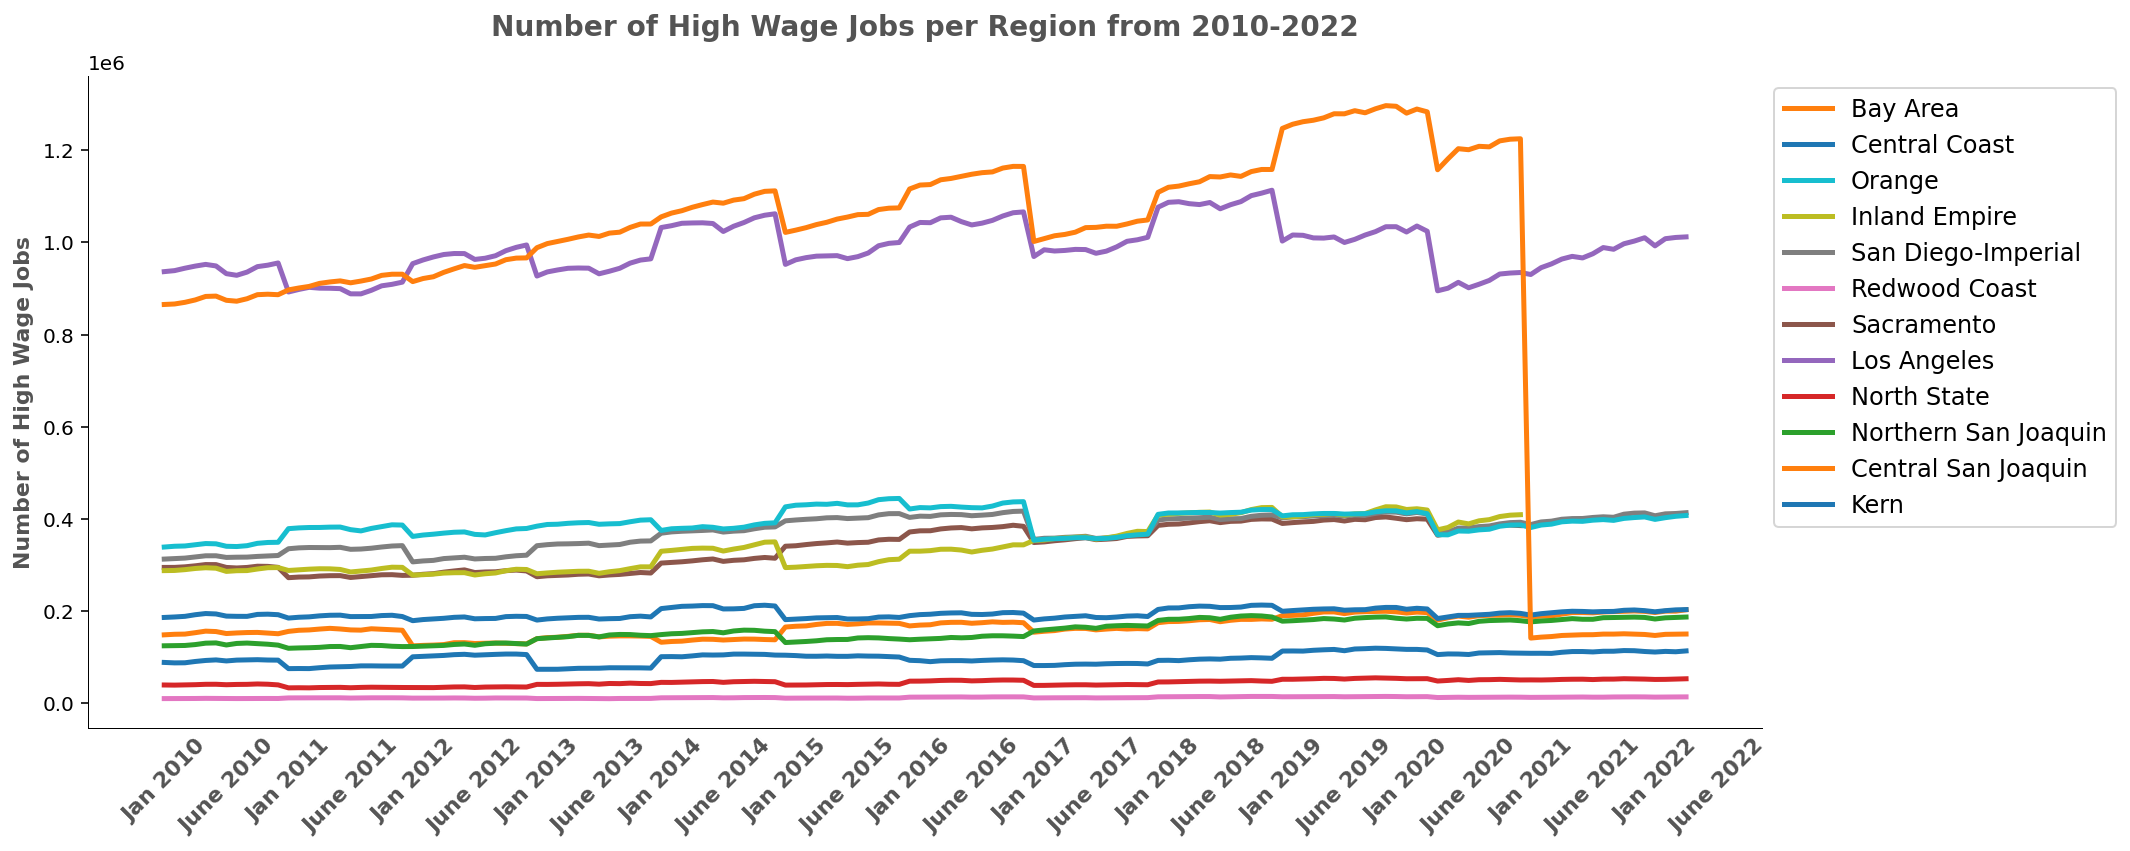

In [76]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(hw_kern['High Wage Count'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['High Wage Count'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['High Wage Count'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['High Wage Count'].values, lw=2.5, label='North State')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

tick_labels = []
for year in np.arange(2010, 2023):
    tick_labels.append(f'Jan {year}')
    tick_labels.append(f'June {year}')

ax.set_xticklabels(tick_labels, 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)

ax.set_title('Number of High Wage Jobs per Region from 2010-2022', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, len(tick_labels) * 6, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Number of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

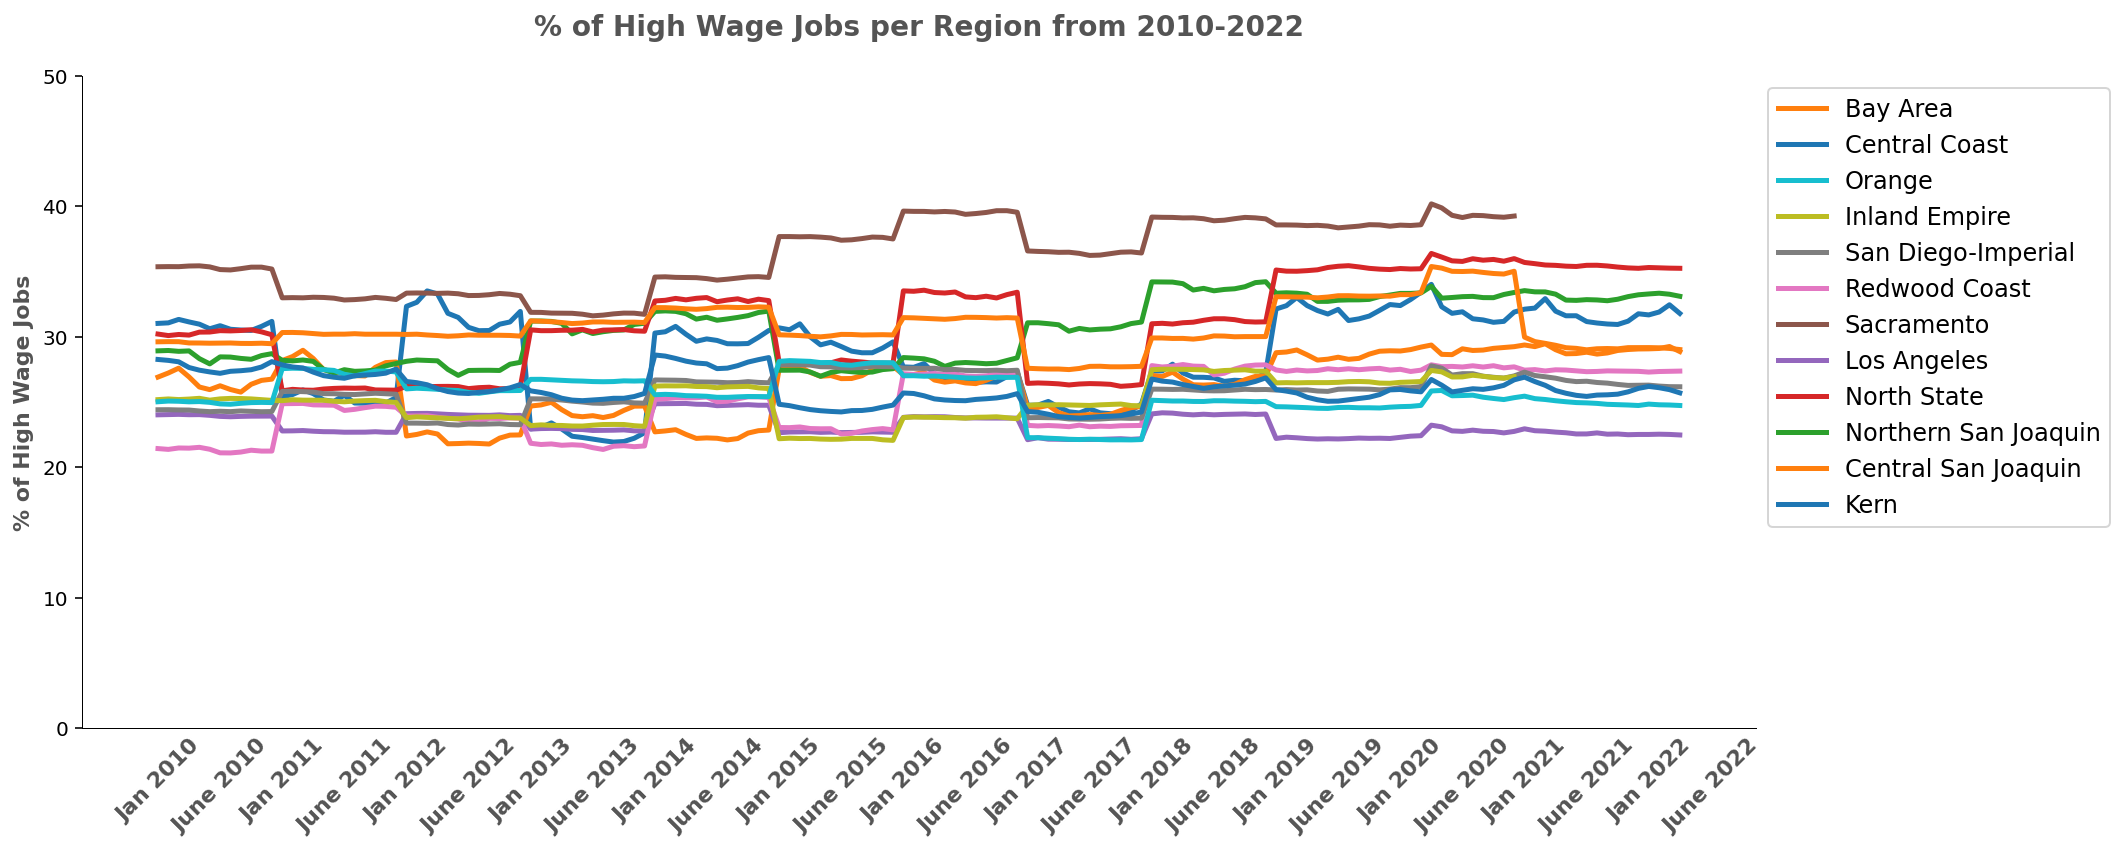

In [77]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(hw_kern['Percentage'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['Percentage'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['Percentage'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['Percentage'].values, lw=2.5, label='North State')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

tick_labels = []
for year in np.arange(2010, 2023):
    tick_labels.append(f'Jan {year}')
    tick_labels.append(f'June {year}')

ax.set_xticklabels(tick_labels, 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)

ax.set_title('% of High Wage Jobs per Region from 2010-2022', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, len(tick_labels) * 6, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Miscellaneous Plots

#### Histogram of wages for Kern and Inland Empire  in 2018

In [131]:
ca_ipums_2018 = cleaned_ipums('2018')
ca_ipums_2018 = ca_ipums_2018.loc[ca_ipums_2018.index.repeat(ca_ipums_2018.PERWT)].reset_index(drop=True)

In [132]:
wages = pd.merge(ca_ipums_2018, county_info, on='COUNTYFIP')
wages = wages.drop_duplicates(subset=['YEAR', 'COUNTYFIP', 'INDNAICS', 'PERWT', 'INCWAGE', 'NAICS Code', 'Industry Title', 'Industry', 'County', 'Rural/Urban', 'CDI Regions', 'CERF Regions', 'Population'])
kern_wages = wages.loc[wages['CERF Regions'] == 'Kern']
ie_wages = wages.loc[wages['CERF Regions'] == 'Inland Empire']

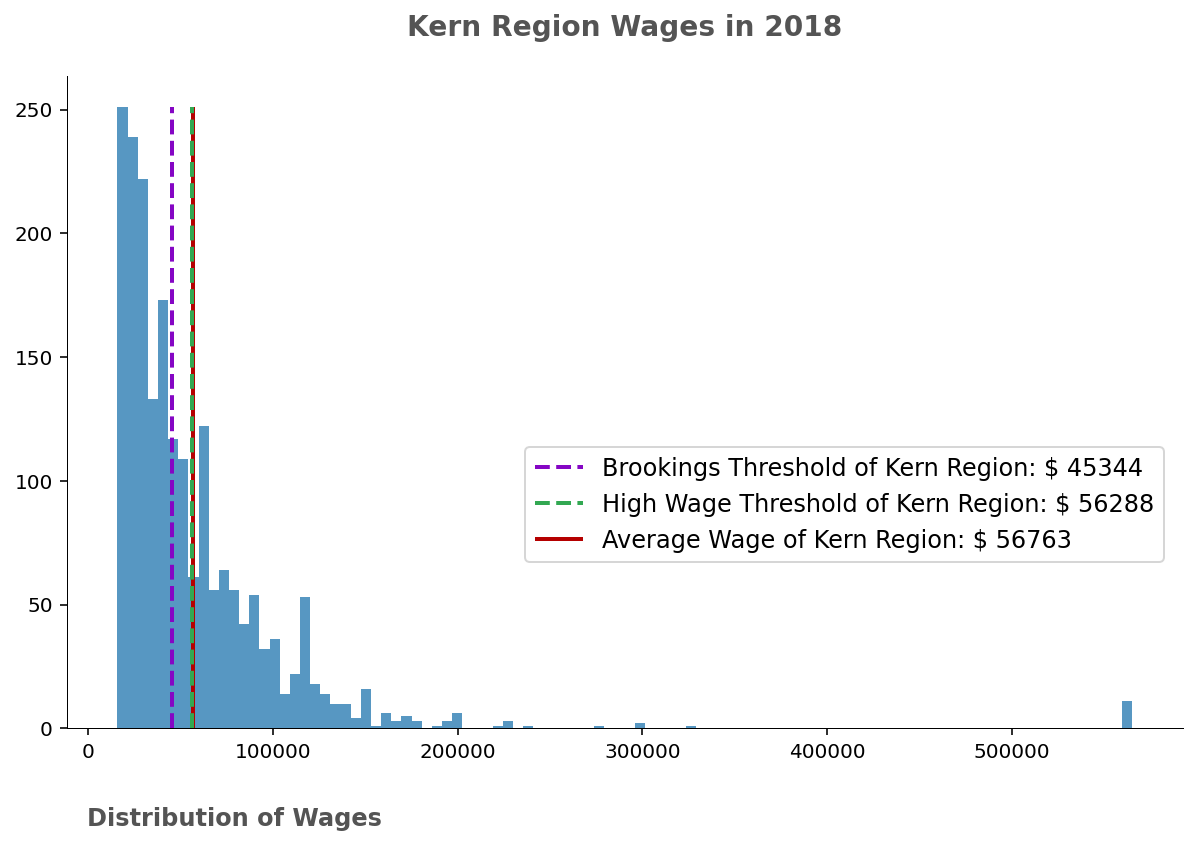

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(kern_wages['INCWAGE'], bins=100, color='#5797c2')

ax.set_xlabel("Distribution of Wages", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.15, -0.12)

ax.set_title(f'Kern Region Wages in 2018', 
             fontsize=14, weight='bold', pad=20, color='#545454')

y, x_, _ = ax.hist(kern_wages['INCWAGE'], bins=100, color='#5797c2')

# avg wage in Kern
avg_wage = np.mean(kern_wages['INCWAGE'])
ax.vlines(x=avg_wage, ymin=0, ymax=y.max(), 
          color='#b50000', lw=2, label=f'Average Wage of Kern Region: $ {round(avg_wage)}')

# CAFWD threshold in Kern
ax.vlines(x=56288, ymin=0, ymax=y.max(), 
          color='#32a852', lw=2, ls='dashed', label=f'High Wage Threshold of Kern Region: $ 56288')

# Brookings Threshold in Kern
ax.vlines(x=45344, ymin=0, ymax=y.max(), 
          color='#8506c4', lw=2, ls='dashed', label=f'Brookings Threshold of Kern Region: $ 45344')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.4, 0.45), loc='upper left', fontsize=12)

plt.show()    

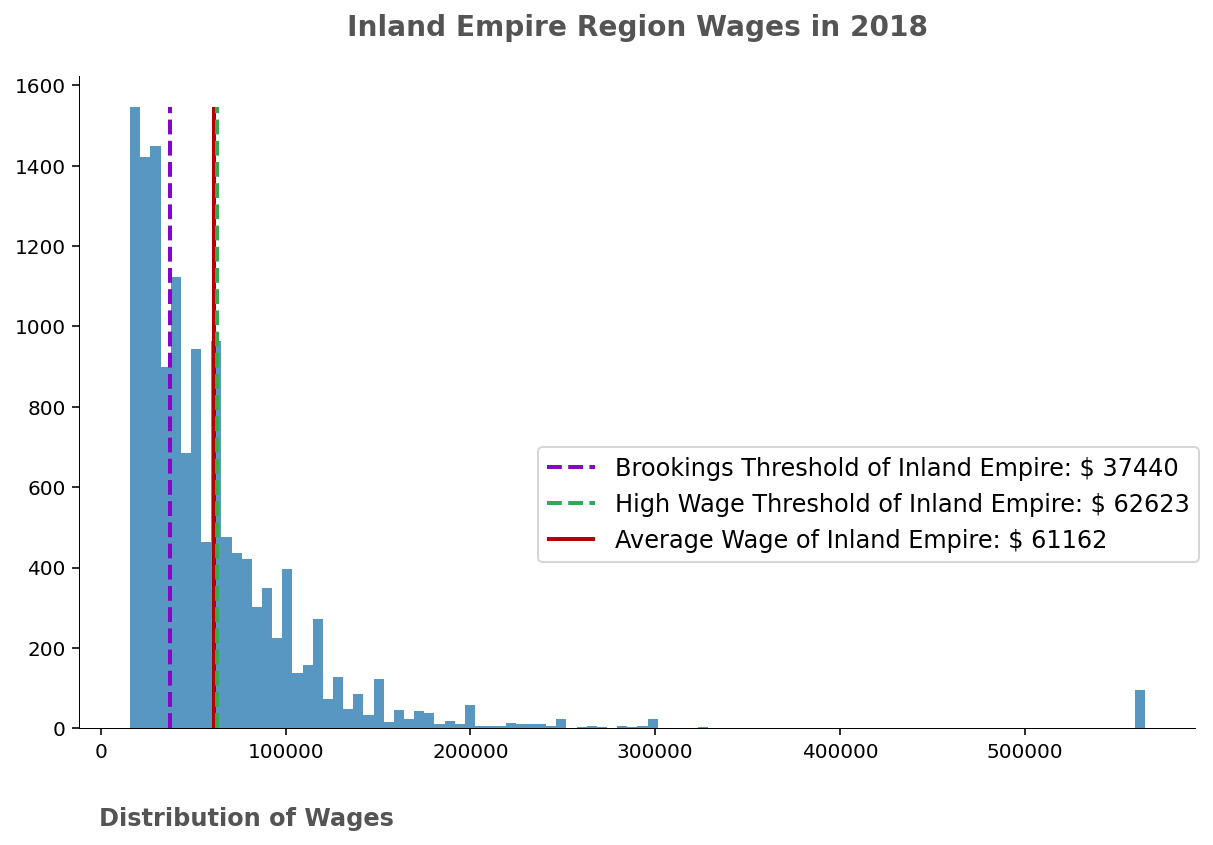

In [141]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(ie_wages['INCWAGE'], bins=100, color='#5797c2')

ax.set_xlabel("Distribution of Wages", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.15, -0.12)

ax.set_title(f'Inland Empire Region Wages in 2018', 
             fontsize=14, weight='bold', pad=20, color='#545454')

y, x_, _ = ax.hist(ie_wages['INCWAGE'], bins=100, color='#5797c2')

# avg wage in IE
avg_wage = np.mean(ie_wages['INCWAGE'])
ax.vlines(x=avg_wage, ymin=0, ymax=y.max(), 
          color='#b50000', lw=2, label=f'Average Wage of Inland Empire: $ {round(avg_wage)}')

# CAFWD threshold in IE
ax.vlines(x=62623, ymin=0, ymax=y.max(), 
          color='#32a852', lw=2, ls='dashed', label=f'High Wage Threshold of Inland Empire: $ 62623')

# Brookings threshold in IE
ax.vlines(x=37440, ymin=0, ymax=y.max(), 
          color='#8506c4', lw=2, ls='dashed', label=f'Brookings Threshold of Inland Empire: $ 37440')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.4, 0.45), loc='upper left', fontsize=12)

plt.show()    